# **Milestone 1**

### **Context:**

 - Why is this problem important to solve?

 * In the context of a growing market for second-hand vehicles versus a decrease in the market for new vehicles, we have been hired for Cars4U to help in the expansion of the company in the market, and take advantage of the opportunities that are appearing in the market since 2018.

### **The objective:**

 - What is the intended goal?

 *  The objective is to find a **price scheme** that allows to easily predict what the price of a used vehicle should be in order to sell it according to the characteristics of the car. This will relieve the marketing and sales department of operative work since it will allow, based on the result, to develop better strategies than the competition, and maximize profits by fine-tuning marketing efforts according to the customer segment for which the vehicle is intended. So the company can focus on better segmenting its potential buyers.

### **The key questions:**

- What are the key questions that need to be answered?


*	Which are the variables that are really important to consider when establishing the price range for a second hand vehicle offer.
*	What are the actions/recommendations that the marketing and sales department should take to maximize the profits and to growth the participation in the used cars market.
*	What relationships exists between the variables that the company currently had and what opportunities to incorporate new features can be deduced from the results.




### **The problem formulation**:

- What is it that we are trying to solve using data science?

* Based on the data provided, we need to build an **predictive model** based on a set of features that allows us to quickly and efficiently obtain the target price at which we should sell a certain brand / model of car.

## **Data Dictionary**

**S.No.** : Serial Number

**Name** : Name of the car which includes Brand name and Model name

**Location** : The location in which the car is being sold or is available for purchase (Cities)

**Year** : Manufacturing year of the car

**Kilometers_driven** : The total kilometers driven in the car by the previous owner(s) in KM

**Fuel_Type** : The type of fuel used by the car (Petrol, Diesel, Electric, CNG, LPG)

**Transmission** : The type of transmission used by the car (Automatic / Manual)

**Owner** : Type of ownership

**Mileage** : The standard mileage offered by the car company in kmpl or km/kg

**Engine** : The displacement volume of the engine in CC

**Power** : The maximum power of the engine in bhp

**Seats** : The number of seats in the car

**New_Price** : The price of a new car of the same model in INR 100,000

**Price** : The price of the used car in INR 100,000 (**Target Variable**)

## **Important Notes**

- This notebook can be considered a guide to refer to while solving the problem. The evaluation will be as per the Rubric shared for each Milestone. Unlike previous courses, it does not follow the pattern of the graded questions in different sections. This notebook will give you a direction on what steps need to be taken in order to get a viable solution to the problem. Please note that this is just one way of doing this. There can be other 'creative' ways to solve the problem and we urge you to feel free and explore them as an 'optional' exercise. 

- In the notebook, there are markdown cells called - Observations and Insights. It is a good practice to provide observations and extract insights from the outputs.

- The naming convention for different variables can vary. Please consider the code provided in this notebook as a sample code.

- All the outputs in the notebook are just for reference and can be different if you follow a different approach.

- There are sections called **Think About It** in the notebook that will help you get a better understanding of the reasoning behind a particular technique/step. Interested learners can take alternative approaches if they wish to explore different techniques. 

# **Milestone 1** 

### **Loading libraries**

In [18]:
# Import required libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# To ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Remove the limit from the number of displayed columns and rows. It helps to see the entire dataframe while printing it
pd.set_option("display.max_columns", None)

### **Let us load the data**

In [19]:
data = pd.read_csv("used_cars.csv")

### **Understand the data by observing a few rows**

In [20]:
# View first 5 rows
data.head()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,8.61,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,NaN,17.74


In [21]:
# View last 5 rows Hint: Use tail() method
data.tail()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price
7248,7248,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.54,1598.0,103.6,5.0,NaN,NaN
7249,7249,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,17.21,1197.0,103.6,5.0,NaN,NaN
7250,7250,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.08,1461.0,63.1,5.0,NaN,NaN
7251,7251,Volkswagen Polo GT TSI,Pune,2013,52262,Petrol,Automatic,Third,17.20,1197.0,103.6,5.0,NaN,NaN
7252,7252,Mercedes-Benz E-Class 2009-2013 E 220 CDI Avan...,Kochi,2014,72443,Diesel,Automatic,First,10.00,2148.0,170.0,5.0,NaN,NaN


**Observations and Insights: _____**
* The dataset provided contains **7253 rows and 14 columns** and each one consist in different attributes of the car like: The Year of fabrication, the name (brand + model), the engine in cc, power, gearbox type, number of seats etc.
* We had 5 categorical and 9 numerical variables and we can se some missing data 
* The dependent variable is the price, and the objective will consist in use the independent variables to implement a model able to predict the target value which can be used in pricing segmentation for the company.
* But first we need to make some EDA analisis to understand the data

### **Let us check the data types and and missing values of each column** 

In [22]:
# Check the datatypes of each column. Hint: Use info() method
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   float64
 9   Engine             7207 non-null   float64
 10  Power              7078 non-null   float64
 11  Seats              7200 non-null   float64
 12  New_price          1006 non-null   float64
 13  Price              6019 non-null   float64
dtypes: float64(6), int64(3), object(5)
memory usage: 793.4+ KB


In [23]:
# Check total number of missing values of each column. Hint: Use isnull() method
data.isnull().sum() 

S.No.                   0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 46
Power                 175
Seats                  53
New_price            6247
Price                1234
dtype: int64

**Observations and Insights: _____**
* The variables **Mileage, Engine, Power, Seats, Price and New_price** present some missing data, this will need to be treated later 

We can observe that `S.No.` has no null values. Also the number of unique values are equal to the number of observations. So, `S.No.` looks like an index for the data entry and such a column would not be useful in providing any predictive power for our analysis. Hence, it can be dropped.

In [24]:
# Remove S.No. column from data. Hint: Use inplace = True
data.drop(columns = {'S.No.'},inplace=True)

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               7253 non-null   object 
 1   Location           7253 non-null   object 
 2   Year               7253 non-null   int64  
 3   Kilometers_Driven  7253 non-null   int64  
 4   Fuel_Type          7253 non-null   object 
 5   Transmission       7253 non-null   object 
 6   Owner_Type         7253 non-null   object 
 7   Mileage            7251 non-null   float64
 8   Engine             7207 non-null   float64
 9   Power              7078 non-null   float64
 10  Seats              7200 non-null   float64
 11  New_price          1006 non-null   float64
 12  Price              6019 non-null   float64
dtypes: float64(6), int64(2), object(5)
memory usage: 736.8+ KB


## **Exploratory Data Analysis**

### **Let us now explore the summary statistics of numerical variables**

In [26]:
# Explore basic summary statistics of numeric variables. Hint: Use describe() method.
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,7253.0,2013.365366,3.254421,1996.00,2011.000,2014.00,2016.0000,2019.00
Kilometers_Driven,7253.0,58699.063146,84427.720583,171.00,34000.000,53416.00,73000.0000,6500000.00
Mileage,7251.0,18.141580,4.562197,0.00,15.170,18.16,21.1000,33.54
Engine,7207.0,1616.573470,595.285137,72.00,1198.000,1493.00,1968.0000,5998.00
Power,7078.0,112.765214,53.493553,34.20,75.000,94.00,138.1000,616.00
Seats,7200.0,5.280417,0.809277,2.00,5.000,5.00,5.0000,10.00
New_price,1006.0,22.779692,27.759344,3.91,7.885,11.57,26.0425,375.00
Price,6019.0,9.479468,11.187917,0.44,3.500,5.64,9.9500,160.00


**Observations and Insights: _____**
* The **Kilometers_Driven** variables has outliers since the max value is far away from the Q3 value
* The **Mileage** variable present a min value 0 which appear to be missing entries instead of a real value
* Also the max values for the **Price** and **New_price** present some outliers

### **Let us also explore the summary statistics of all categorical variables and the number of unique observations in each category**

In [27]:
# Explore basic summary statistics of categorical variables. Hint: Use the argument include = ['object'] 
data.describe(include=['object']).T

,count,unique,top,freq
Name,7253,2041,Mahindra XUV500 W8 2WD,55
Location,7253,11,Mumbai,949
Fuel_Type,7253,5,Diesel,3852
Transmission,7253,2,Manual,5204
Owner_Type,7253,4,First,5952


**Number of unique observations in each category**

In [28]:
cat_cols = data.select_dtypes(include = ['object']).columns

for column in cat_cols:
    
    print("For column:", column)
    
    print(data[column].nunique())
    
    print('-'*50)

For column: Name
2041
--------------------------------------------------
For column: Location
11
--------------------------------------------------
For column: Fuel_Type
5
--------------------------------------------------
For column: Transmission
2
--------------------------------------------------
For column: Owner_Type
4
--------------------------------------------------


#### **Observations and Insights: _____**
* The **Name** column has 2041 unique values considering the sample 7253 records in the dataset we can say that we hav a lot of repeated car models on the dataset
* The cars provided in the dataset came from **11 diferent locations** across india with almost 13% from Mumbai
* The majority of the records **82%** has the value **First** for the **Owner Type** this indicates a predominance for this behaviour on the market

**Think About It**: 

- We could observe from summary statistics that kilometers_driven has extreme values. Can we look at the manufactured year for cars with extreme values for kilometers_driven? 
- Also, we could observe the feature mileage has values zero. Can the mileage of a car be zero?

**Let's explore the two points mentioned above**

**Check Kilometers_Driven extreme values**

In [29]:
# Sort the dataset in 'descending' order using the feature 'Kilometers_Driven'
data.sort_values('Kilometers_Driven', ascending=False).head(10)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price
2328,BMW X5 xDrive 30d M Sport,Chennai,2017,6500000,Diesel,Automatic,First,15.97,2993.0,258.00,5.0,NaN,65.00
340,Skoda Octavia Ambition Plus 2.0 TDI AT,Kolkata,2013,775000,Diesel,Automatic,First,19.30,1968.0,141.00,5.0,NaN,7.50
1860,Volkswagen Vento Diesel Highline,Chennai,2013,720000,Diesel,Manual,First,20.54,1598.0,103.60,5.0,NaN,5.90
358,Hyundai i10 Magna 1.2,Chennai,2009,620000,Petrol,Manual,First,20.36,1197.0,78.90,5.0,NaN,2.70
2823,Volkswagen Jetta 2013-2015 2.0L TDI Highline AT,Chennai,2015,480000,Diesel,Automatic,First,16.96,1968.0,138.03,5.0,NaN,13.00
3092,Honda City i VTEC SV,Kolkata,2015,480000,Petrol,Manual,First,17.40,1497.0,117.30,5.0,NaN,5.00
4491,Hyundai i20 Magna Optional 1.2,Bangalore,2013,445000,Petrol,Manual,First,18.50,1197.0,82.90,5.0,NaN,4.45
6921,Maruti Swift Dzire Tour LDI,Jaipur,2012,350000,Diesel,Manual,First,23.40,1248.0,74.00,5.0,NaN,NaN
3649,Tata Indigo LS,Jaipur,2008,300000,Diesel,Manual,First,17.00,1405.0,70.00,5.0,NaN,1.00
1528,Toyota Innova 2.5 G (Diesel) 8 Seater BS IV,Hyderabad,2005,299322,Diesel,Manual,First,12.80,2494.0,102.00,8.0,NaN,4.00


In the first row, a car manufactured as recently as 2017 having been driven 6500000 km is almost impossible. It can be considered as data entry error and so we can remove this value/entry from data.

In [30]:
# Removing the 'row' at index 2328 from the data. Hint: use the argument inplace=True
data.drop(2328,inplace=True)

**Check Mileage extreme values**

In [31]:
# Sort the dataset in 'ascending' order using the feature 'Mileage'
data.sort_values('Mileage', ascending=True).head(10)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price
2597,Hyundai Santro Xing XP,Pune,2007,70000,Petrol,Manual,First,0.0,1086.0,NaN,5.0,NaN,1.12
2343,Hyundai Santro AT,Hyderabad,2006,74483,Petrol,Automatic,First,0.0,999.0,NaN,5.0,NaN,2.30
5270,Honda City 1.5 GXI,Bangalore,2002,53000,Petrol,Manual,Second,0.0,NaN,NaN,NaN,NaN,1.85
424,Volkswagen Jetta 2007-2011 1.9 L TDI,Hyderabad,2010,42021,Diesel,Manual,First,0.0,1968.0,NaN,5.0,NaN,5.45
6857,Land Rover Freelander 2 TD4 SE,Mumbai,2011,87000,Diesel,Automatic,First,0.0,2179.0,115.0,5.0,NaN,NaN
443,Hyundai Santro GLS I - Euro I,Coimbatore,2012,50243,Petrol,Manual,First,0.0,1086.0,NaN,5.0,NaN,3.35
5119,Hyundai Santro Xing XP,Kolkata,2008,45500,Petrol,Manual,Second,0.0,1086.0,NaN,5.0,NaN,1.17
5022,Land Rover Freelander 2 TD4 SE,Hyderabad,2013,46000,Diesel,Automatic,Second,0.0,2179.0,115.0,5.0,NaN,26.00
5016,Land Rover Freelander 2 TD4 HSE,Delhi,2013,72000,Diesel,Automatic,First,0.0,2179.0,115.0,5.0,NaN,15.50
2542,Hyundai Santro GLS II - Euro II,Bangalore,2011,65000,Petrol,Manual,Second,0.0,NaN,NaN,NaN,NaN,3.15


#### **Observations**
* Mileage of cars can not be 0, so we should treat 0's as missing values. We will do it in the Feature Engineering part.

## **Univariate Analysis**
Univariate analysis is used to explore each variable in a data set, separately. It looks at the range of values, as well as the central tendency of the values. It can be done for both numerical and categorical variables.

## **1. Univariate Analysis - Numerical Data**
Histograms and box plots help to visualize and describe numerical data. We use box plot and histogram to analyse the numerical columns.

In [32]:
# Let us write a function that will help us create a boxplot and histogram for any input numerical variable.
# This function takes the numerical column as the input and returns the boxplots and histograms for the variable.

def histogram_boxplot(feature, figsize = (15, 10), bins = None):
    
    """ Boxplot and histogram combined
    
    feature: 1-d feature array
    
    figsize: size of fig (default (9, 8))
    
    bins: number of bins (default None / auto)
    
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid = 2
                                           sharex = True, # X-axis will be shared among all subplots
                                           gridspec_kw = {"height_ratios": (.25, .75)}, 
                                           figsize = figsize 
                                           ) # Creating the 2 subplots
    
    sns.boxplot(feature, ax = ax_box2, showmeans = True, color = 'violet') # Boxplot will be created and a symbol will indicate the mean value of the column
    
    sns.distplot(feature, kde = F, ax = ax_hist2, bins = bins, palette = "winter") if bins else sns.distplot(feature, kde = False, ax = ax_hist2) # For histogram
    
    ax_hist2.axvline(np.mean(feature), color = 'green', linestyle = '--') # Add mean to the histogram
    
    ax_hist2.axvline(np.median(feature), color = 'black', linestyle = '-') # Add median to the histogram

**Let us plot histogram and box-plot for the feature 'Kilometers_Driven' to understand the distribution and outliers, if any.**

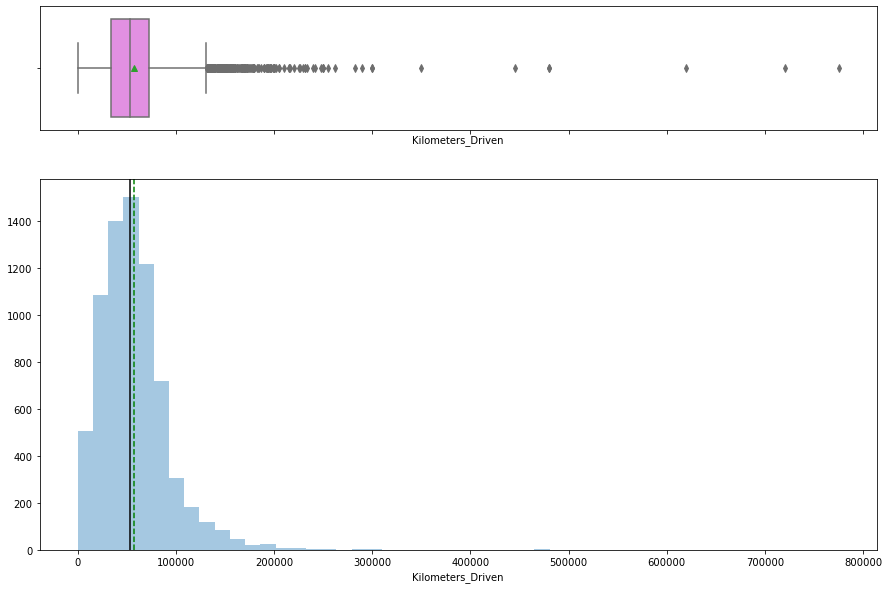

In [33]:
# Plot histogram and box-plot for 'Kilometers_Driven'
histogram_boxplot(data['Kilometers_Driven'])

**Think About It**: Kilometers_Driven is highly right-skewed. Can we use Log transformation of the feature to reduce/remove the skewness? Why can't we keep skewed data?

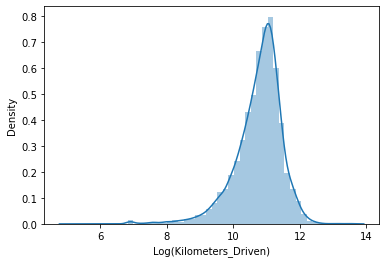

In [34]:
# Log transformation of the feature 'Kilometers_Driven'
sns.distplot(np.log(data["Kilometers_Driven"]), axlabel = "Log(Kilometers_Driven)");

**Observations and Insights: _____**
* After observing the distribution we see too much outliers for the Kilometers driven column, in this case we can't simply drop this records. The **Log transformation** is useful for this scenarios cause helps to normalize the data. 
* If we dont do that transformation we are going to maintain this outliers and this has a negative impact in the model, for example in this right skewed case we have that a  statistical measure like the mean will be too separated from the median this can be a problem. Also mantain the variable skewed **doesn't help to visualize the behaviour** when will be confronted to another variables in the **multicolinearity analisis** that will be required.

In [35]:
# We can add a transformed kilometers_driven feature in data
data["kilometers_driven_log"] = np.log(data["Kilometers_Driven"])

**Note:** Like Kilometers_Driven, the distribution of Price is also highly skewed, we can use log transformation on this column to see if that helps normalize the distribution. And add the transformed variable into the dataset. You can name the variable as **'price_log'**.

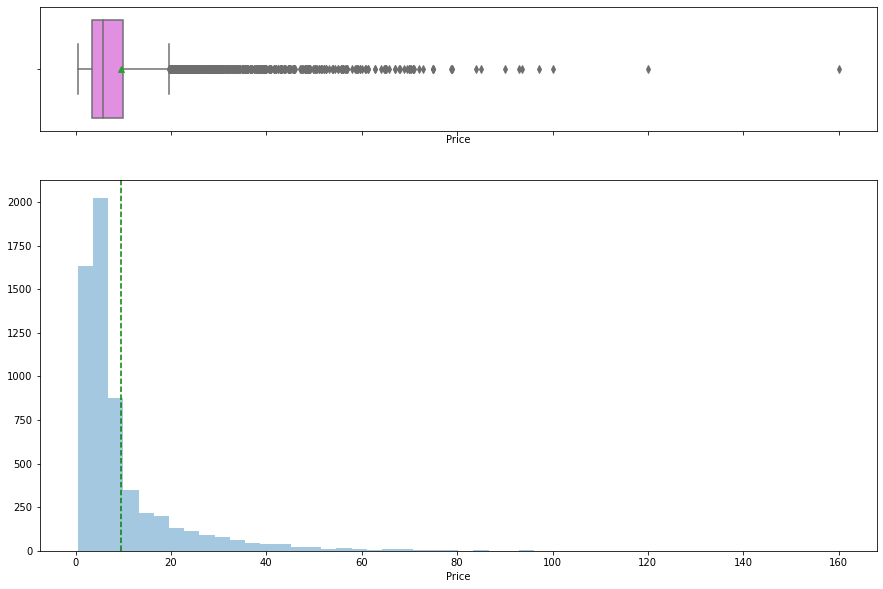

In [36]:
# Plot histogram and box-plot for 'Price'
histogram_boxplot(data['Price'])

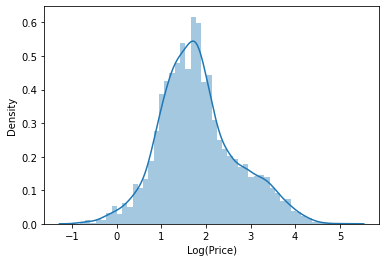

In [37]:
# Log transformation of the feature 'Price'
sns.distplot(np.log(data["Price"]), axlabel = "Log(Price)");

In [38]:
# We can Add a transformed Price feature in data
data["Price_log"] = np.log(data["Price"])

**Note:** Try plotting histogram and box-plot for different numerical features and understand how the data looks like.

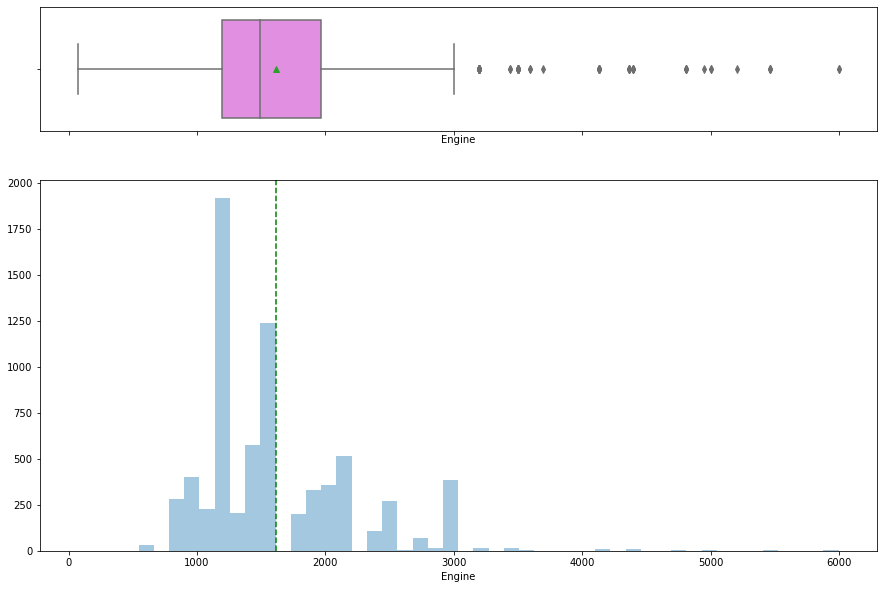

In [39]:
histogram_boxplot(data['Engine'])

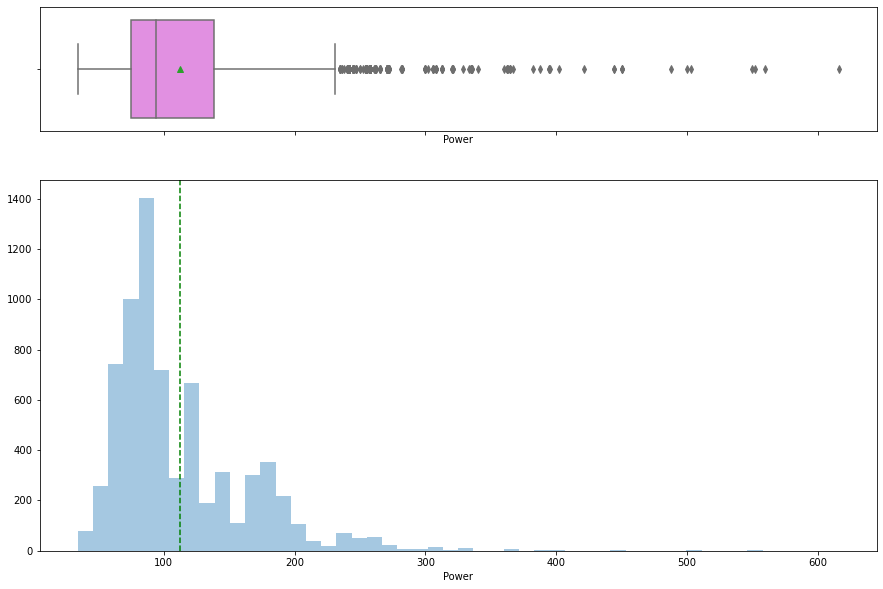

In [40]:
histogram_boxplot(data['Power'])

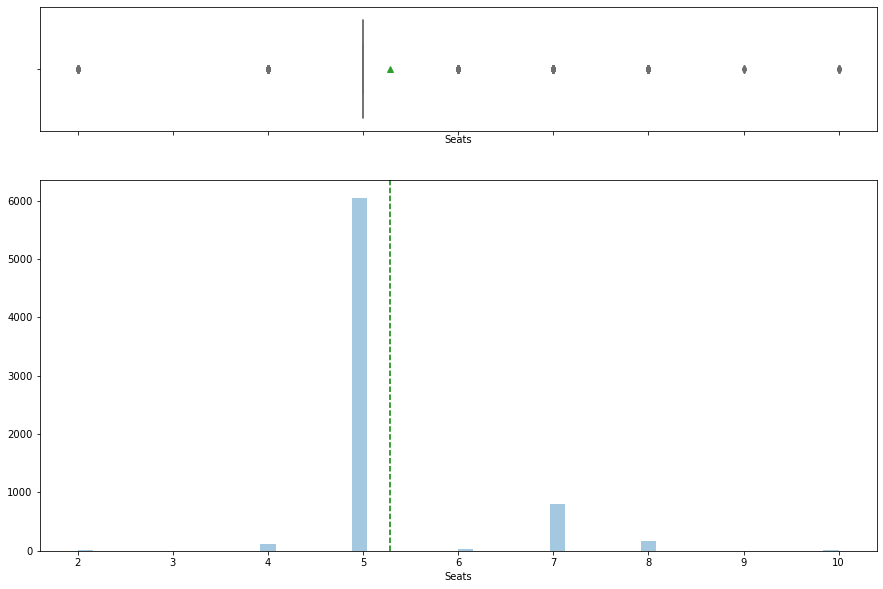

In [41]:
histogram_boxplot(data['Seats'])

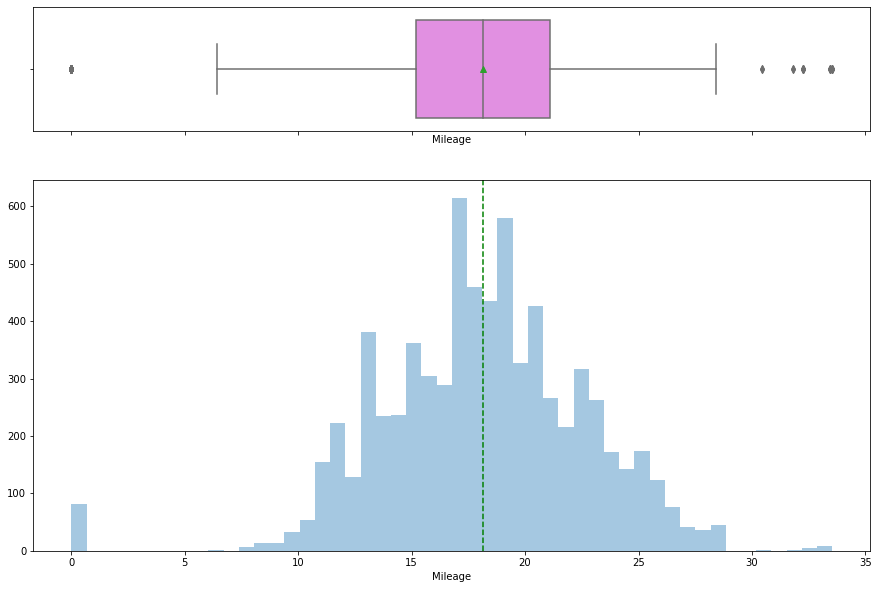

In [42]:
histogram_boxplot(data['Mileage'])

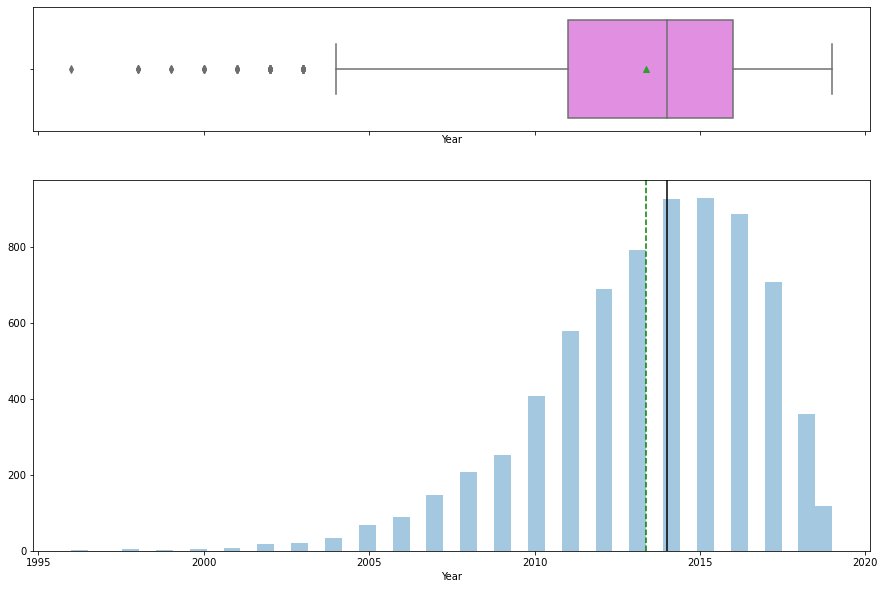

In [43]:
histogram_boxplot(data['Year'])

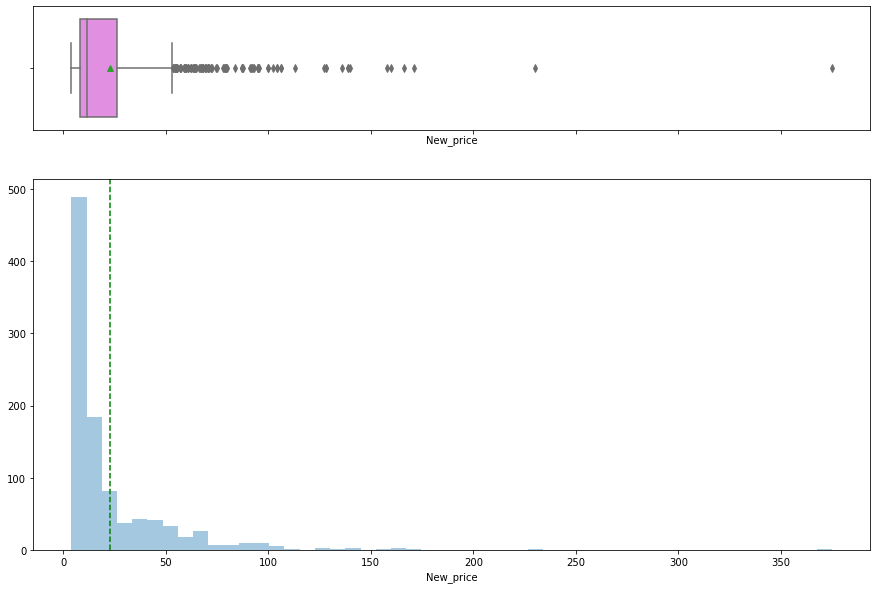

In [44]:
histogram_boxplot(data['New_price'])

**Observations and Insights for all the plots: _____**

* For the **Engine** variable we also can see a light right skewed data distribution, a probably cause of this is because the dataset provided includes car with more performance than others (ie. Sport class cars vs economic daily cars models) so in this case we need to look carefully other statistical measures for example the max value is close to 6000cc, this value is 3x the value for the Q3. We can manage the assumption of **"cars classes"** since high end models are usually more rarely in the second hand market than daily economy models.

* For the **Power** variable the histogram reveals similar behaviour to Engine column, since the power is a **strongly related to the capacity of the engine** we can conclude the same as above

* For **Seats** the distribution reveals that 5 is the value more frequent in the data by far.

* The most normalized distribution so far is the **Mileage**, in this case we have a reduced group of outliers with value 0, this can be interpreted as missing values and will be treated later.

* In the case of **Year** the histogram reveals a slight left skewed data distribution with values **2014 and 2015** as the most frequent, but considering the min an max values detected prior which are not extreme we can stay with this column.

* **New Price** is the value for the brand new model in the dataset but present the most larger ammount of missing values, we can treat this using different strategies later

## **2. Univariate analysis - Categorical Data**

In [45]:
# Let us write a function that will help us create barplots that indicate the percentage for each category.
# This function takes the categorical column as the input and returns the barplots for the variable.

def perc_on_bar(z):
    '''
    plot
    feature: categorical feature
    the function won't work if a column is passed in hue parameter
    '''

    total = len(data[z]) # Length of the column
    
    plt.figure(figsize = (15, 5))
    
    ax = sns.countplot(data[z], palette = 'Paired', order = data[z].value_counts().index)
    
    for p in ax.patches:
        
        percentage = '{:.1f}%'.format(100 * p.get_height() / total) # Percentage of each class of the category
        
        x = p.get_x() + p.get_width() / 2 - 0.05 # Width of the plot
        
        y = p.get_y() + p.get_height()           # Hieght of the plot
        
        ax.annotate(percentage, (x, y), size = 12) # Annotate the percantage 
    
    plt.show() # Show the plot

**Let us plot barplot for the variable location. It will be helpful to know the number of percentage of cars from each city.**

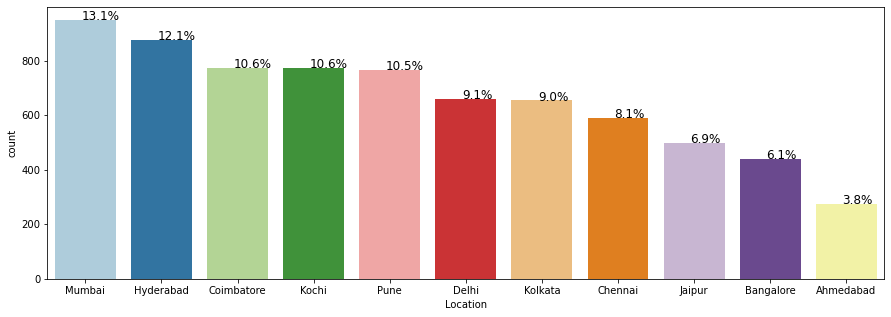

In [46]:
# Bar Plot for 'Location'
perc_on_bar('Location')

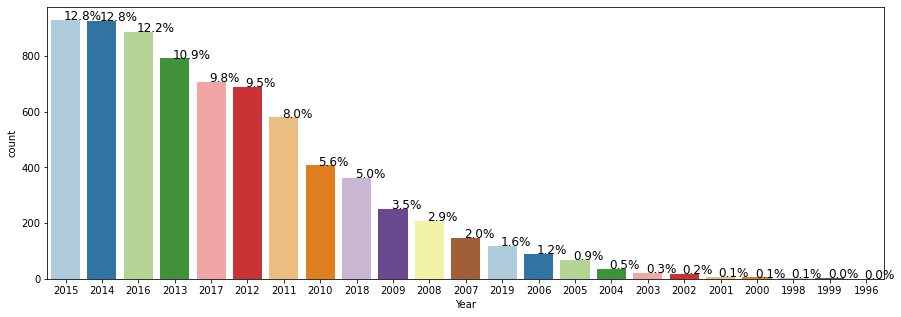

In [47]:
perc_on_bar('Year')

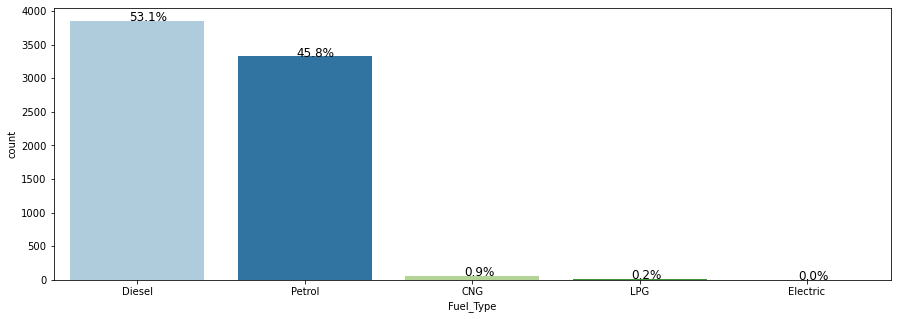

In [48]:
perc_on_bar('Fuel_Type')

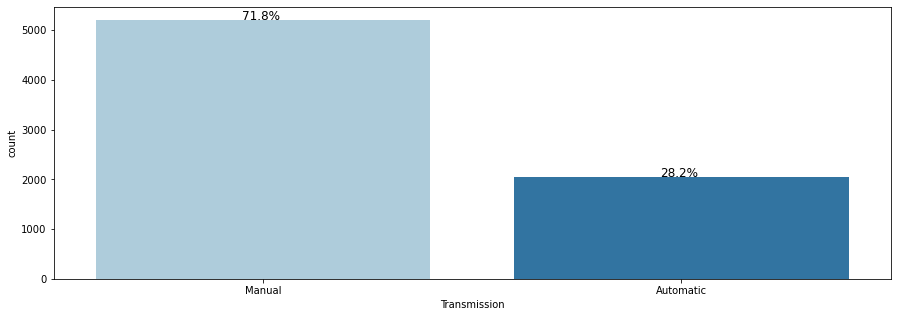

In [49]:
perc_on_bar('Transmission')

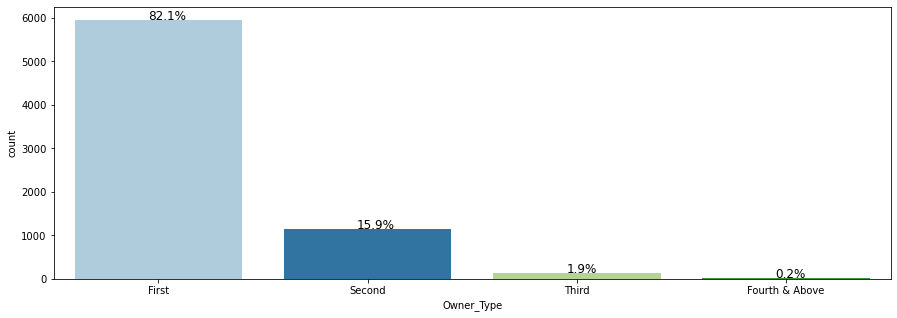

In [50]:
perc_on_bar('Owner_Type')

**Note:** Explore for other variables like Year, Fuel_Type, Transmission, Owner_Type`.

**Observations and Insights from all plots: _____**

* As the histograms reveal earlier the categorical variables had different distributions, the **Location** variable is uniformly distributed among the records, with Mumbai being the one with the highest repetition with **13.1%** and 
Ahmedabad the least with **3.8%**

* **Year** as i mentioned before has a different behavior, the years from **2010 to 2018** concentrate most of the distribution having the **86%** of the records, the left 14% goes from 2009 till 1996

* For the variable **Fuel Type** almost all the records are dividen between Diesel 53.1% and Petrol 45.8%, together represent **99%** of the records

* In the variable  **Transmission** we only have 2 values ​​Manual and Automatic, being Manual 71% of the total

* For the variable **Owner Type** there is a predominance of cars with only one use being 82% of the total.

## **Bivariate Analysis**

### **1. Scatter plot**
A scatter plot allows us to see relationships between two variables. 

**Note: Use log transformed values 'kilometers_driven_log' and 'price_log'**

<AxesSubplot:xlabel='Price_log'>

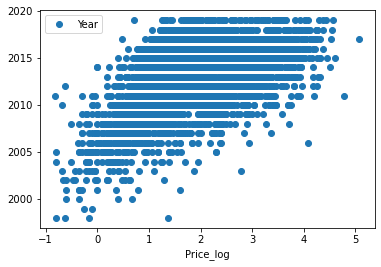

In [51]:
# Let us plot pair plot for the variables 'year' and 'price_log'
data.plot(x = 'Price_log', y = 'Year', style = 'o')

<AxesSubplot:xlabel='Price_log'>

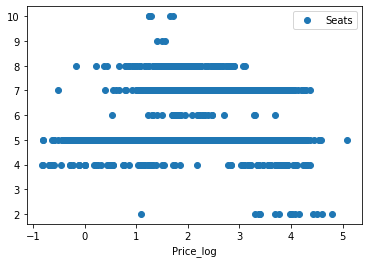

In [52]:
data.plot(x = 'Price_log', y = 'Seats', style = 'o')

<AxesSubplot:xlabel='Price_log'>

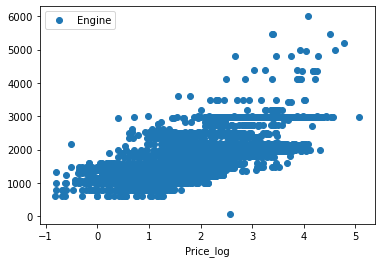

In [53]:
data.plot(x = 'Price_log', y = 'Engine', style = 'o')

<AxesSubplot:xlabel='Price_log'>

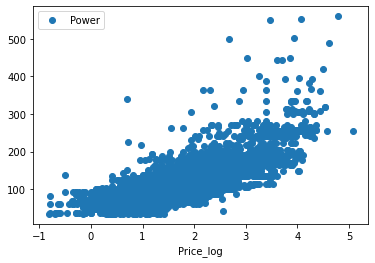

In [54]:
data.plot(x = 'Price_log', y = 'Power', style = 'o')

<AxesSubplot:xlabel='Price_log'>

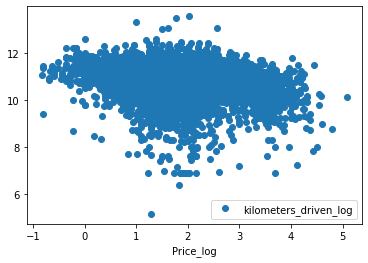

In [55]:
data.plot(x = 'Price_log', y = 'kilometers_driven_log', style = 'o')

<AxesSubplot:xlabel='Engine'>

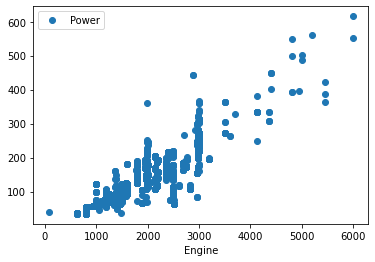

In [56]:
data.plot(x = 'Engine', y = 'Power', style = 'o')

<b>Note:</b> Try to explore different combinations of independent variables and dependent variable. Understand the relationship between all variables.

**Observations and Insights from all plots: _____**

* For the case of **Year** and **Price_Log** we can see that there is a certain correlation that is diluted as we move along the axis of the years, this may make sense because the **most recent cars usually have a higher resale price** but it is conditioned to other characteristics. (i.e. mileage, engine) that can change the final price.

* The duo **Seats** and **Price_log** It is quite scattered, although the data seems to be concentrated in the center, that is, cars with 5 seats, however, it is very dispersed around the price axis, so there is **no clear indication between both variables**, Seats is probably a variable with less weight. in the final decision of the price and that makes more sense combined with other variables

* The plot for **Price_log** and **Engine** shows a positive correlation between the variables which makes sense since the greater the cylinder capacity, the greater the power and therefore the vehicle can be better valued. Same situation occurs when we plot with the **Power** variable since seems to be highly correlated

* With the transformed variable **kilometers_driven_log** we can see some pattern concentrated between values 9 and 12 of the vertical axis and the price value fluctuating across the -1 and 5 

* Just to confirm the suspicion I have graphed the relationship between **Engine** and **Power** and the positive correlation between the two variables is confirmed, the greater the displacement of the engine, the greater the power delivery, finally we could use only one of these two variables to simplify the subsequent analysis


### **2. Heat map**
Heat map shows a 2D correlation matrix between two numerical features.

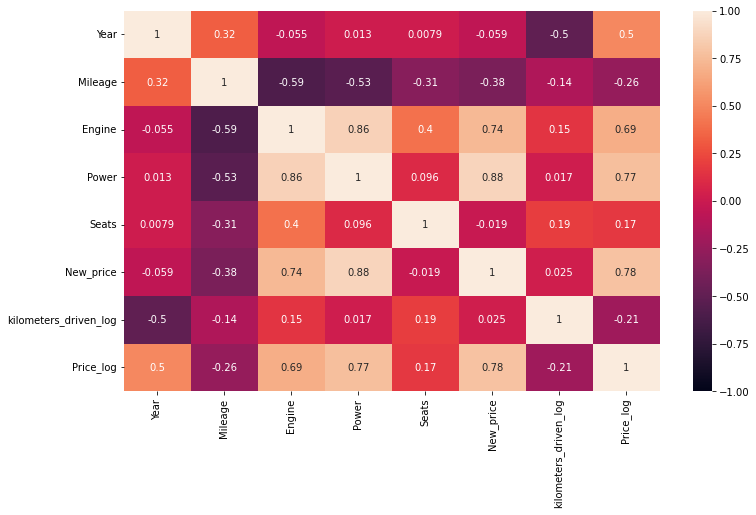

In [57]:
# We can include the log transformation values and drop the original skewed data columns
plt.figure(figsize = (12, 7))

sns.heatmap(data.drop(['Kilometers_Driven','Price'],axis = 1).corr(), annot = True, vmin = -1, vmax = 1)

plt.show()

**Observations and Insights: _____**

* The most strong **positive** correlation it appears between the variables **New_Price** and **Power (0.88)**, closely followed by **Engine** and **Power (0.86)** as we assumed from the previous analysis, logically the third is New_Price and Engine. 

* While the strongest **negative** correlation occurs between the **Engine** and **Mileage** variables **(-0.59)**, which makes a lot of sense since as the vehicle's mileage increases -that is, its use-  it is more likely that the power will decrease and this has an influence on the perception of the potential buyer. 


### **3. Box plot**

In [58]:
# Let us write a function that will help us create boxplot w.r.t Price for any input categorical variable.
# This function takes the categorical column as the input and returns the boxplots for the variable.
def boxplot(z):
    
    plt.figure(figsize = (12, 5)) # Setting size of boxplot
    
    sns.boxplot(x = z, y = data['Price']) # Defining x and y
    
    plt.show()
    
    plt.figure(figsize = (12, 5))
    
    plt.title('Without Outliers')
    
    sns.boxplot(x = z, y = data['Price'], showfliers = False) # Turning off the outliers
    
    plt.show()

#### Let us now plot bivariate analysis of target variable with a categorical variable 'Location'

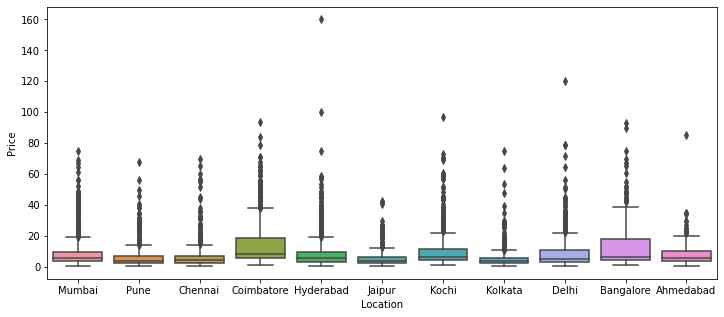

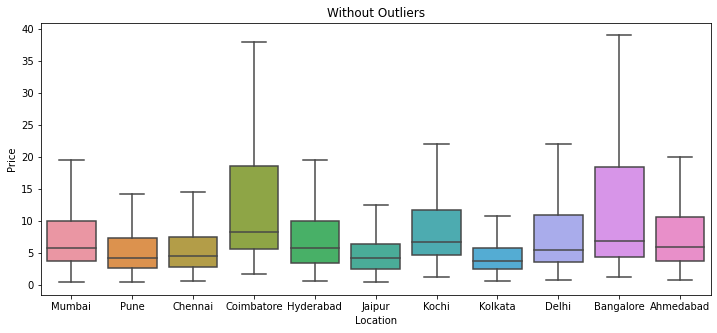

In [59]:
# Box Plot: Price vs Location
boxplot(data['Location'])

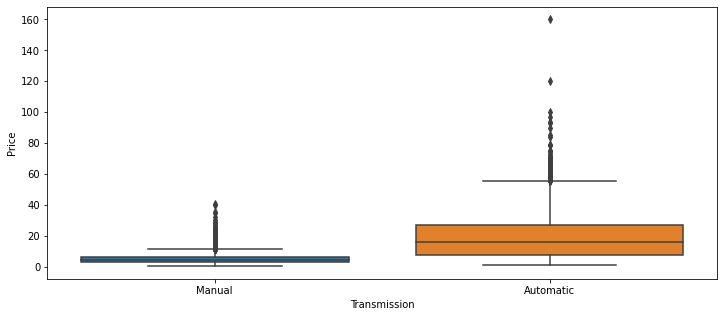

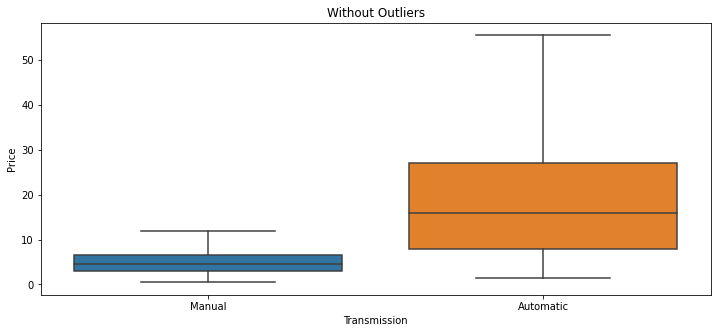

In [60]:
boxplot(data['Transmission'])

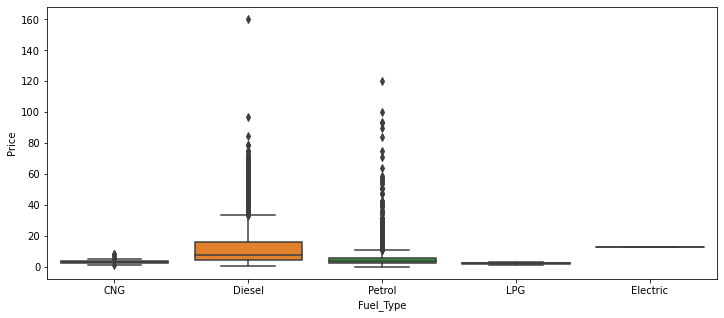

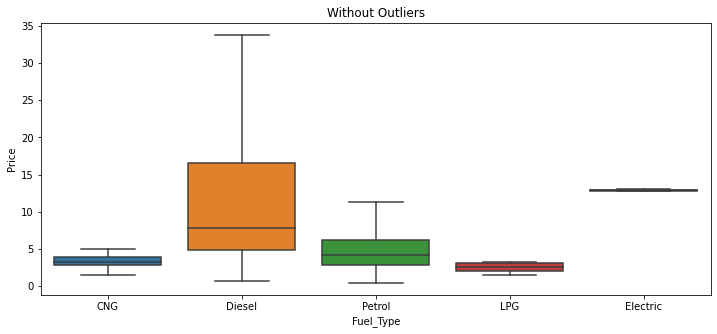

In [61]:
boxplot(data['Fuel_Type'])

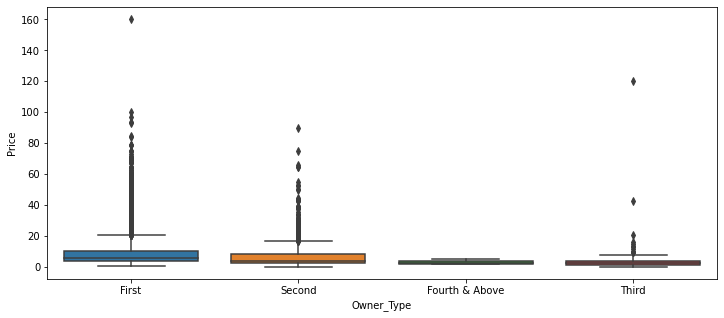

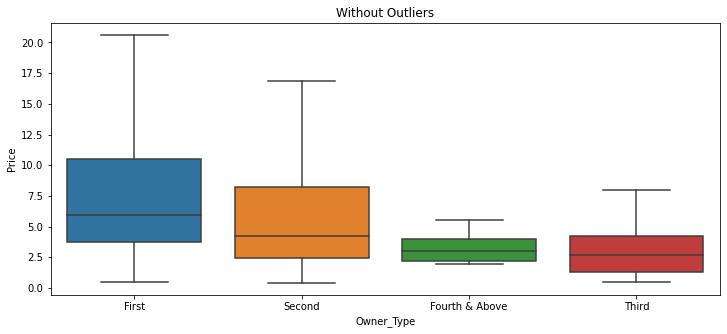

In [62]:
boxplot(data['Owner_Type'])

<b>Note: </b> Explore by plotting box-plots for target variable and the other categorical variables like Fuel_Type, transmission, Owner_type.

**Observations and Insights for all plots:__**

* Regarding the **Location** variable, it can be seen that the price range is very similar, with two cities where the value of the third quartile Q3 is further apart from the mean, these are the cities of **Coimbatore and Bangalore**, as well as the outliers in some cases are separated much more than this for example in the case of Hyderabad and Delhi, while **without the outliers** the situation becomes much clearer and we can discover that the average prices are very similar, with the values ​​of Q3 and maximum being the highest in the two cities mentioned, even in some cities the value of Q3 is above the maximum value of other cities (i.e Coimbatore and Jaipur)

* For the categorical variable of **Transmission** we see that prices fluctuate very little for **Manual** type cars, being only a few units, while for cars with automatic gearboxes the price variation is much greater in the case range of 20 price units. We can see that etween the value Q1 and Q3 of the Automatic box plot.
additionally we can notice that the value of the third quartile of the automatics is greater than the maximum value of the cars with manual gearboxes, even the average is

* For the variable of **Fuel Type** we can observe that the greatest variation is found in the **diesel** type, the rest is very even, it is even almost non-existent for electric cars, this due to the small number of cars of this type in the sample presented

* In the case of **Owner Type**, when we only consider the graph without the outliers, it is much clearer the price variations between the cars with only one use and then these differences are reduced between Q1 and Q3, along with the maximum values.

### **Feature Engineering**

**Think about it:** The `Name` column in the current format might not be very useful in our analysis.
Since the name contains both the brand name and the model name of the vehicle, the column would have too many unique values to be useful in prediction. Can we extract that information from that column? 

* **Hint:** With 2041 unique names, car names are not going to be great predictors of the price in our current data. But we can process this column to extract important information for example brand name.

In [63]:
#Adding  a new colmn called Brand based on the column Name
data["Brand"] = data["Name"].str.split(' ').str[0]

data.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price,kilometers_driven_log,Price_log,Brand
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,NaN,1.75,11.184421,0.559616,Maruti
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,NaN,12.50,10.621327,2.525729,Hyundai
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,8.61,4.50,10.736397,1.504077,Honda
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,NaN,6.00,11.373663,1.791759,Maruti
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,NaN,17.74,10.613246,2.875822,Audi


In [64]:
data["Model"] = data["Name"].str.split(n=1).str[1]
data.head()


,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price,kilometers_driven_log,Price_log,Brand,Model
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,NaN,1.75,11.184421,0.559616,Maruti,Wagon R LXI CNG
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,NaN,12.50,10.621327,2.525729,Hyundai,Creta 1.6 CRDi SX Option
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,8.61,4.50,10.736397,1.504077,Honda,Jazz V
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,NaN,6.00,11.373663,1.791759,Maruti,Ertiga VDI
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,NaN,17.74,10.613246,2.875822,Audi,A4 New 2.0 TDI Multitronic


#### **Observations and Insights: _____**

* One of the most obvious actions for this dataset is to **separate the brand from the model** that are found together in a single column. This is necessary since in the automotive market the brands alone have a great weight in **price differentiation**, so some brands focus only on more exclusive segments while others produce cars more for everyday use.

* For this we make use of the split function taking as a mark the **first word** of the Name field, after reviewing the result we can take advantage of creating a second column with only the name of the model for purposes of better graphing and not redound in case we need to do some other analysis of a specific brand. After applying the function, we notice that the Land Rover brand is an exception, however, since there is no other brand that begins with the same word, we can safely assume that the brand **Land = Land Rover**

### **Missing value treatment**

In [66]:
# Now check the missing values of each column. Hint: Use isnull() method
data.isnull().sum()

Name                        0
Location                    0
Year                        0
Kilometers_Driven           0
Fuel_Type                   0
Transmission                0
Owner_Type                  0
Mileage                     2
Engine                     46
Power                     175
Seats                      53
New_price                6246
Price                    1234
kilometers_driven_log       0
Price_log                1234
Brand                       0
Model                       0
dtype: int64

#### **Observations and Insights: _____**

* For the missing values we can observe that the **MIleage, Engine, Power, Seats, New price, Price and price log** columns have missing values ​​and consequently we have to find the best way to treat them as the case may be

**Missing values in Seats**

In [67]:
# Checking missing values in the column 'Seats'
data['Seats'].value_counts(dropna = False)

5.0     6047
7.0      796
8.0      170
4.0      119
NaN       53
6.0       38
2.0       18
10.0       8
9.0        3
Name: Seats, dtype: int64

In [68]:
#Reviewing the Names with missing values in the Seats column
data[data['Seats'].isna()].groupby('Name').sum()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,New_price,Price,kilometers_driven_log,Price_log
Name,,,,,,,,,,
BMW 5 Series 520d Sedan,14076,647158,129.36,0.0,0.0,0.0,0.0,74.74,79.804950,13.428423
Fiat Punto 1.2 Dynamic,2017,17941,15.70,0.0,0.0,0.0,0.0,3.93,9.794844,1.368639
Fiat Punto 1.3 Emotion,2011,45271,20.30,0.0,0.0,0.0,0.0,2.60,10.720422,0.955511
Fiat Punto 1.4 Emotion,4020,112000,29.20,0.0,0.0,0.0,0.0,1.49,21.840045,0.398776
Ford Endeavour Hurricane LE,2012,129000,12.80,2953.0,0.0,0.0,0.0,7.00,11.767568,1.945910
Ford Figo Diesel,2015,70436,0.00,1498.0,99.0,0.0,0.0,3.60,11.162460,1.280934
Honda CR-V AT With Sun Roof,2013,27000,14.00,0.0,0.0,0.0,0.0,11.99,10.203592,2.484073
Honda City 1.3 DX,2009,55005,12.80,0.0,0.0,0.0,0.0,3.20,10.915179,1.163151
Honda City 1.5 EXI,2005,88000,13.00,1493.0,100.0,0.0,0.0,1.70,11.385092,0.530628


**Think about it:** Can we somehow use the extracted information from 'Name' column to impute missing values?

**Hint:** Impute these missing values one by one, by taking median number of seats for the particular car, using the Brand and Model name.


In [69]:
#Obtaining the median for Seats by Brand
data[data['Seats'].notnull()].groupby('Brand').median()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,New_price,Price,kilometers_driven_log,Price_log
Brand,,,,,,,,,,
Ambassador,2003.0,80000.0,12.800,1489.0,35.500,5.0,NaN,1.350,11.289782,0.300105
Audi,2014.0,52830.0,15.730,1968.0,174.330,5.0,55.610,23.500,10.874834,3.157000
BMW,2013.0,52050.0,17.050,1995.0,190.000,5.0,58.670,21.330,10.859960,3.060115
Bentley,2007.0,39600.0,9.400,5998.0,584.000,4.5,375.000,59.000,10.563565,4.077537
Chevrolet,2012.0,62242.0,18.100,1199.0,79.400,5.0,NaN,2.500,11.038785,0.916291
Datsun,2016.0,20487.0,20.630,1198.0,67.000,5.0,4.370,3.100,9.927546,1.131402
Fiat,2011.0,56947.0,19.000,1248.0,90.600,5.0,8.955,2.600,10.949861,0.955511
Force,2014.0,41000.0,17.000,2200.0,139.010,7.0,NaN,8.000,10.621327,2.079442
Ford,2014.0,60328.0,18.880,1498.0,89.840,5.0,11.200,5.345,11.007552,1.676161


In [70]:
# Impute missing values in Seats,you can use fillna method in pandas
data['Seats'] = data['Seats'].fillna(data.groupby('Brand')['Seats'].transform('median'))

In [71]:
# Now check total number of missing values of the seat column to verify if they are imputed or not. Hint: Use isnull() method
data[data['Seats'].isnull()].groupby('Name').count()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price,kilometers_driven_log,Price_log,Brand,Model
Name,,,,,,,,,,,,,,,,


**Missing values for Mileage**

In [72]:
# Now check missing values of each column. Hint: Use isnull() method
data.isnull().sum()

Name                        0
Location                    0
Year                        0
Kilometers_Driven           0
Fuel_Type                   0
Transmission                0
Owner_Type                  0
Mileage                     2
Engine                     46
Power                     175
Seats                       0
New_price                6246
Price                    1234
kilometers_driven_log       0
Price_log                1234
Brand                       0
Model                       0
dtype: int64

In [73]:
# Impute missing Mileage. For example, use can use median or any other methods.
data['Mileage'].fillna(data['Mileage'].mean(), inplace = True)


In [74]:
# Now check total number of missing values of the Mileage column to verify if they are imputed or not. Hint: Use isnull() method
data[data['Mileage'].isnull()]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price,kilometers_driven_log,Price_log,Brand,Model


**Missing values for Engine**

In [75]:
data[data['Engine'].isnull()]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price,kilometers_driven_log,Price_log,Brand,Model
194,Honda City 1.5 GXI,Ahmedabad,2007,60006,Petrol,Manual,First,0.00,NaN,NaN,5.0,NaN,2.95,11.002200,1.081805,Honda,City 1.5 GXI
208,Maruti Swift 1.3 VXi,Kolkata,2010,42001,Petrol,Manual,First,16.10,NaN,NaN,5.0,NaN,2.11,10.645449,0.746688,Maruti,Swift 1.3 VXi
733,Maruti Swift 1.3 VXi,Chennai,2006,97800,Petrol,Manual,Third,16.10,NaN,NaN,5.0,NaN,1.75,11.490680,0.559616,Maruti,Swift 1.3 VXi
749,Land Rover Range Rover 3.0 D,Mumbai,2008,55001,Diesel,Automatic,Second,0.00,NaN,NaN,5.0,NaN,26.50,10.915107,3.277145,Land,Rover Range Rover 3.0 D
1294,Honda City 1.3 DX,Delhi,2009,55005,Petrol,Manual,First,12.80,NaN,NaN,5.0,NaN,3.20,10.915179,1.163151,Honda,City 1.3 DX
1327,Maruti Swift 1.3 ZXI,Hyderabad,2015,50295,Petrol,Manual,First,16.10,NaN,NaN,5.0,NaN,5.80,10.825661,1.757858,Maruti,Swift 1.3 ZXI
1385,Honda City 1.5 GXI,Pune,2004,115000,Petrol,Manual,Second,0.00,NaN,NaN,5.0,NaN,1.50,11.652687,0.405465,Honda,City 1.5 GXI
1460,Land Rover Range Rover Sport 2005 2012 Sport,Coimbatore,2008,69078,Petrol,Manual,First,0.00,NaN,NaN,5.0,NaN,40.88,11.142992,3.710641,Land,Rover Range Rover Sport 2005 2012 Sport
2074,Maruti Swift 1.3 LXI,Pune,2011,24255,Petrol,Manual,First,16.10,NaN,NaN,5.0,NaN,3.15,10.096378,1.147402,Maruti,Swift 1.3 LXI
2096,Hyundai Santro LP zipPlus,Coimbatore,2004,52146,Petrol,Manual,First,0.00,NaN,NaN,5.0,NaN,1.93,10.861803,0.657520,Hyundai,Santro LP zipPlus


In [76]:
#Imputing Engine using mean by group of Brand 
#data['Engine'] = data['Engine'].fillna(data.groupby('Brand')['Engine'].transform('mean'))
data['Engine'].fillna(data['Engine'].mean(), inplace = True)
#Validating the NaN values 
data[data['Engine'].isnull()]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price,kilometers_driven_log,Price_log,Brand,Model


**Missing values for Power**

In [77]:
data[data['Power'].isnull()]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price,kilometers_driven_log,Price_log,Brand,Model
76,Ford Fiesta 1.4 SXi TDCi,Jaipur,2008,111111,Diesel,Manual,First,17.80,1399.000000,NaN,5.0,NaN,2.00,11.618285,0.693147,Ford,Fiesta 1.4 SXi TDCi
79,Hyundai Santro Xing XL,Hyderabad,2005,87591,Petrol,Manual,First,0.00,1086.000000,NaN,5.0,NaN,1.30,11.380434,0.262364,Hyundai,Santro Xing XL
89,Hyundai Santro Xing XO,Hyderabad,2007,73745,Petrol,Manual,First,17.00,1086.000000,NaN,5.0,NaN,2.10,11.208368,0.741937,Hyundai,Santro Xing XO
120,Hyundai Santro Xing XL eRLX Euro III,Mumbai,2005,102000,Petrol,Manual,Second,17.00,1086.000000,NaN,5.0,NaN,0.85,11.532728,-0.162519,Hyundai,Santro Xing XL eRLX Euro III
143,Hyundai Santro Xing XO eRLX Euro II,Kochi,2008,80759,Petrol,Manual,Third,17.00,1086.000000,NaN,5.0,NaN,1.67,11.299225,0.512824,Hyundai,Santro Xing XO eRLX Euro II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6896,Toyota Etios Liva GD,Hyderabad,2013,86000,Diesel,Manual,First,23.59,1364.000000,NaN,5.0,NaN,NaN,11.362103,NaN,Toyota,Etios Liva GD
6902,Toyota Etios Liva V,Kochi,2012,59311,Petrol,Manual,First,18.30,1616.382459,NaN,7.0,NaN,NaN,10.990550,NaN,Toyota,Etios Liva V
6947,Toyota Etios Liva G,Delhi,2012,77800,Petrol,Manual,First,18.30,1197.000000,NaN,5.0,NaN,NaN,11.261897,NaN,Toyota,Etios Liva G
7092,Hyundai Santro Xing XG AT eRLX Euro III,Coimbatore,2007,64168,Petrol,Automatic,First,17.00,1086.000000,NaN,5.0,NaN,NaN,11.069260,NaN,Hyundai,Santro Xing XG AT eRLX Euro III


In [78]:
#Imputing Power using mean by group of Brand 
#data['Power'] = data['Power'].fillna(data.groupby('Brand')['Power'].transform('mean'))
data['Power'].fillna(data['Power'].median(), inplace = True)
#Validating the NaN values 
data[data['Power'].isnull()]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price,kilometers_driven_log,Price_log,Brand,Model


**Missing values for New_price**

In [79]:
data[data['New_price'].isnull()]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price,kilometers_driven_log,Price_log,Brand,Model
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,NaN,1.75,11.184421,0.559616,Maruti,Wagon R LXI CNG
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,NaN,12.50,10.621327,2.525729,Hyundai,Creta 1.6 CRDi SX Option
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,NaN,6.00,11.373663,1.791759,Maruti,Ertiga VDI
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,NaN,17.74,10.613246,2.875822,Audi,A4 New 2.0 TDI Multitronic
5,Hyundai EON LPG Era Plus Option,Hyderabad,2012,75000,LPG,Manual,First,21.10,814.0,55.20,5.0,NaN,2.35,11.225243,0.854415,Hyundai,EON LPG Era Plus Option
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7248,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.54,1598.0,103.60,5.0,NaN,NaN,11.400999,NaN,Volkswagen,Vento Diesel Trendline
7249,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,17.21,1197.0,103.60,5.0,NaN,NaN,10.985293,NaN,Volkswagen,Polo GT TSI
7250,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.08,1461.0,63.10,5.0,NaN,NaN,10.239960,NaN,Nissan,Micra Diesel XV
7251,Volkswagen Polo GT TSI,Pune,2013,52262,Petrol,Automatic,Third,17.20,1197.0,103.60,5.0,NaN,NaN,10.864025,NaN,Volkswagen,Polo GT TSI


In [80]:
#Imputing New_price using mean by group of Brand 
#data['New_price'] = data['New_price'].fillna(data.groupby('Brand')['New_price'].transform('mean'))
data['New_price'].fillna(data['New_price'].median(), inplace = True)
#Validating the NaN values on New Prices column 
data[data['New_price'].isnull()]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price,kilometers_driven_log,Price_log,Brand,Model


In [82]:
# Finally checking the missing values of all the independent variables. Price (price_log is the target) 
data.isnull().sum()

Name                        0
Location                    0
Year                        0
Kilometers_Driven           0
Fuel_Type                   0
Transmission                0
Owner_Type                  0
Mileage                     0
Engine                      0
Power                       0
Seats                       0
New_price                   0
Price                    1234
kilometers_driven_log       0
Price_log                1234
Brand                       0
Model                       0
dtype: int64

In [83]:
#Imputing New_price using mean by group of Brand 
data["Price"].fillna(data['Price'].median(), inplace = True) 
data.isnull().sum()

Name                        0
Location                    0
Year                        0
Kilometers_Driven           0
Fuel_Type                   0
Transmission                0
Owner_Type                  0
Mileage                     0
Engine                      0
Power                       0
Seats                       0
New_price                   0
Price                       0
kilometers_driven_log       0
Price_log                1234
Brand                       0
Model                       0
dtype: int64

In [84]:
#Imputing New_price using mean by group of Brand 
data["Price_log"].fillna(data['Price_log'].median(), inplace = True) 
data.isnull().sum()

Name                     0
Location                 0
Year                     0
Kilometers_Driven        0
Fuel_Type                0
Transmission             0
Owner_Type               0
Mileage                  0
Engine                   0
Power                    0
Seats                    0
New_price                0
Price                    0
kilometers_driven_log    0
Price_log                0
Brand                    0
Model                    0
dtype: int64

**Observations for missing values after imputing: _____**

* **Imputing values for Seats:** This variable presents missing values ​​in 53 cases, to impute them we make use of the new **brand** variable following this  reasoning, although most of the entries in the dataset are around the value 5, they may have some variation so to make finer the imputation we look for the **median** (not the mean) for each brand. The mean can give us a floating number and there are no cars with, for example, **4.3 seats!** The median of each group can help us for the models of that brand that do not have the value in the Seats column.

* **Imputing values for Mileage:** This variable has only 2 missing values, so it is not worth having to make an imputation by brand, we can take, unlike the previous case, simply the mean of the dataset

* **Imputing values for Engine:** This case is more similar to that of the Seats variable, for the Engines the **Brand has a relevant weight**, usually a BMW engine has more displacement than a Nissan, that is why we do the imputation of missing values ​​in the same way, searching by **group=brand**. One difference is that since the engine displacement is always a big number with a lot of variation and a wider range, we can take the average and it is not so necessary to use the median like the seats

* **Imputing values for Power:** exactly the same logic as with Engine

* **Imputing values for New_Price:** This case is much more particular, since most records do not have the value in the dataset. One idea is to apply the same imputation logic by brand but after doing a subsequent analysis we find that there are **still vehicles with missing values** ​​since their brands do not have any reference value for the price in any of their models **(i.e. Chevrolet)**. In this case, we can only use the entire dataset to make the imputation of the remaining cars, although the idea in the real world would be to search for additional records outside the sample that allow us to make an imputation of the Retail Price by brand.

## **Proposed approach**

- **Potential techniques -** What different techniques should be explored?

* Since the outcome (Price_log) is a **continuous variable** we need by definition to apply a Regression technique, first we will try a **Linear regression** model (a line through our n-dimentional data space) to establish if we can find a model that can fit properly our data points minimizing the loss in the way, then after perfom different **feature engineering** methods, if we can´t find a satisfactory solution we should try a **non-linear regression** (a curve in a n-dimentional space).

- **Overall solution design -** What is the potential solution design?

1. Perform an **EDA analisis**, establish the inputs and outputs. Visualize the data
2. Understand the correlation between variables and interpret the behaviour of the features against the dependant variable independently **(Uni/Multi Variate analisis)**
3. If any perform **missing values** treatment to complete the gaps in the dataset provided. (Feature Engineering). 
4. **Modeling** a first attempt of Linear Regression with all the variables, and then through an iterative approach improve the performance of the model. Drop or combine variables if necessary. Look for the **performance assessment**.   
5. Test the model, detects over/underfitting go back to step 4 if necessary
6. Interpret the results in a way that can be digestable for the business and perform conclusions and recomendations.

- **Measures of success -** What are the key measures of success?

* In the Performance Assessment phase we will look for different metrics to establish the success of the proposed model. 
•	R Squared, to measure the % of the variance to the Price (target variable) offered by the models
•	Adjusted R Squared, similar but penalizing in case we have many independent features in the model
•	RMSE(Root Mean Squared Error) since is more sensitive to outliers


### **Saving the Data**

Please save the pre-processed dataset into a separate file so that we can continue without having to repeat the work we did in Milestone1. The stored data frame can be loaded into Milestone2 and implemented further.

To save the pre-processed data frame, please follow the below lines of code:

In [188]:
# Assume df_cleaned is the pre-processed data frame in your code, then
data.to_csv("cars_data_updated_milestone1.csv", index = False)

The above code helps to save the cleaned/pre-processed dataset into csv file, that can be further loaded into Milestone2.

# **Milestone 2**

## **Model Building**

1. What we want to predict is the "Price". We will use the normalized version 'price_log' for modeling.
2. Before we proceed to the model, we'll have to encode categorical features. We will drop categorical features like Name. 
3. We'll split the data into train and test, to be able to evaluate the model that we build on the train data.
4. Build Regression models using train data.
5. Evaluate the model performance.

### **Load the data**

In [5]:
import pandas as pd

import seaborn as sns

import numpy as np

import sklearn.metrics as metrics

import matplotlib.pyplot as plt


cars_data = pd.read_csv("cars_data_updated_milestone1.csv")

### **Split the Data**

<li>Step1: Seperating the indepdent variables (X) and the dependent variable (y). 
<li>Step2: Encode the categorical variables in X using pd.dummies.
<li>Step3: Split the data into train and test using train_test_split.

**Think about it:** Why we should drop 'Name','Price','price_log','Kilometers_Driven' from X before splitting?
****************
To perform the different methods of Regression we need two sets of data: Train and Test. For the Train data we only need those features that are treated and curated, in this case **Name** was splitted in **Brand and Model** and **Kilometers_Driven** was normalized to get **Kilometers_Driven_log**. Hence we don't need the original features, this will avoid the proposed models to go through features that are not relevant anymore.
Also **Price and Price_log** are the target variables, then we don't need them in X data (train or test)
****************

In [6]:
# Step-1
X = cars_data.drop(['Name','Price','Price_log','Kilometers_Driven'], axis = 1)

y = cars_data[["Price_log", "Price"]]

In [7]:
# Step-2 Use pd.get_dummies(drop_first = True)
X = pd.get_dummies(X, drop_first = True)

In [8]:
# Step-3 Splitting data into training and test set:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

print(X_train.shape, X_test.shape)

(5076, 2097) (2176, 2097)


In [9]:
# Let us write a function for calculating r2_score and RMSE on train and test data
# This function takes model as an input on which we have trained particular algorithm
# The categorical column as the input and returns the boxplots and histograms for the variable

def get_model_score(model, flag = True):
    '''
    model : regressor to predict values of X

    '''
    # Defining an empty list to store train and test results
    score_list = [] 
    
    pred_train = model.predict(X_train)
    
    pred_train_ = np.exp(pred_train)
    
    pred_test = model.predict(X_test)
    
    pred_test_ = np.exp(pred_test)
    
    train_r2 = metrics.r2_score(y_train['Price'], pred_train_)
    
    test_r2 = metrics.r2_score(y_test['Price'], pred_test_)
    
    train_rmse = metrics.mean_squared_error(y_train['Price'], pred_train_, squared = False)
    
    test_rmse = metrics.mean_squared_error(y_test['Price'], pred_test_, squared = False)
    
    # Adding all scores in the list
    score_list.extend((train_r2, test_r2, train_rmse, test_rmse))
    
    # If the flag is set to True then only the following print statements will be dispayed, the default value is True
    if flag == True: 
        
        print("R-square on training set : ", metrics.r2_score(y_train['Price'], pred_train_))
        
        print("R-square on test set : ", metrics.r2_score(y_test['Price'], pred_test_))
        
        print("RMSE on training set : ", np.sqrt(metrics.mean_squared_error(y_train['Price'], pred_train_)))
        
        print("RMSE on test set : ", np.sqrt(metrics.mean_squared_error(y_test['Price'], pred_test_)))
    
    # Returning the list with train and test scores
    return score_list

**Distribution of Price_log after imputation**

Text(0.5, 1.0, 'Price_Log')

<Figure size 720x432 with 0 Axes>

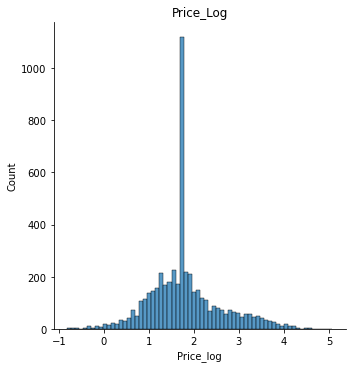

In [41]:

plt.figure(figsize=(10,6))
sns.displot(y_train['Price_log'])
plt.title('Price_Log')

For Regression Problems, some of the algorithms used are :<br>

**1) Linear Regression** <br>
**2) Ridge / Lasso Regression** <br>
**3) Decision Trees** <br>
**4) Random Forest** <br>

### **Fitting a linear model**

Linear Regression can be implemented using: <br>

**1) Sklearn:** https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html <br>
**2) Statsmodels:** https://www.statsmodels.org/stable/regression.html

In [7]:
# Import Linear Regression from sklearn
from sklearn.linear_model import LinearRegression

In [8]:
# Create a linear regression model
lr = LinearRegression()

In [9]:
# Fit linear regression model
lr.fit(X_train, y_train['Price_log']) 

LinearRegression()

In [10]:
# Get score of the model
print("*********LINEAR**************")

LR_score = get_model_score(lr)

*********LINEAR**************
R-square on training set :  0.8800818308926036
R-square on test set :  0.5994655536129823
RMSE on training set :  3.5500798696339473
RMSE on test set :  6.531074032075768


**Observations from results: _____**
***************
The values for RSquare are high on training set this indicates that the model is performing very well on Training data but as soon as we see the results on Test data...**Train 0.88 > Test 0.59** The difference is considerable to be ignored and this can indicate an overfitting in the model and we are capturing too much noise in the data with too much variance. Also the values for **RMSE Train < RMSE Test** which reaffirms that deduction
***************

**Important variables of Linear Regression**

In [22]:
coeff = pd.DataFrame({"Feature":X_train.columns.tolist(),"Coefficients":lr.coef_})
coeff.head(10)

,Feature,Coefficients
0,Year,0.080891
1,Mileage,0.003502
2,Engine,0.000718
3,Power,0.002727
4,Seats,0.034984
5,New_price,0.003188
6,kilometers_driven_log,-0.057204
7,Location_Bangalore,0.047539
8,Location_Chennai,0.019595
9,Location_Coimbatore,0.068709


In [19]:
print(X_train.shape, y_train.shape)

(5076, 2097) (5076, 2)


Text(0.5, 1.0, 'LINEAR REGRESSION')

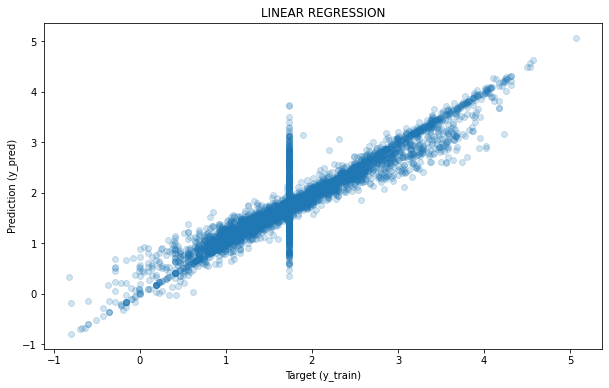

In [42]:
#Plotting the training set to see the model (real vs predict)

y_pred_train = lr.predict(X_train)

plt.figure(figsize=(10,6))

plt.scatter(y_train['Price_log'], y_pred_train, alpha=0.2)

#plt.scatter(y_train['Price'], np.exp(y_pred_train), alpha=0.2)

plt.xlabel('Target (y_train)')

plt.ylabel('Prediction (y_pred)')

plt.title('LINEAR REGRESSION')


Text(0.5, 1.0, 'Residual training')

<Figure size 720x432 with 0 Axes>

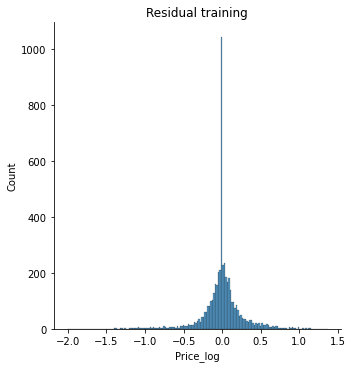

In [30]:
#distribution of the residuals
residual_train = (y_train['Price_log'] - y_pred_train)

#residual_train = (y_train['Price'] - np.exp(y_pred_train))

plt.figure(figsize=(10,6))
sns.displot(residual_train)
plt.title('Residual training')


Building a model using statsmodels.

In [32]:
# Import Statsmodels 
import statsmodels.api as sm

# Statsmodel api does not add a constant by default. We need to add it explicitly
x_train = sm.add_constant(X_train)

# Add constant to test data
x_test = sm.add_constant(X_test)

def build_ols_model(train):
    
    # Create the model
    olsmodel = sm.OLS(y_train["Price_log"], train)
    
    return olsmodel.fit()


# Fit linear model on new dataset
olsmodel1 = build_ols_model(x_train)

print(olsmodel1.summary())

d:\Users\cmedina\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


                            OLS Regression Results                            
Dep. Variable:              Price_log   R-squared:                       0.879
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     13.73
Date:                Thu, 04 Aug 2022   Prob (F-statistic):               0.00
Time:                        16:20:11   Log-Likelihood:                -670.16
No. Observations:                5076   AIC:                             4860.
Df Residuals:                    3316   BIC:                         1.636e+04
Df Model:                        1759                                         
Covariance Type:            nonrobust                                         
                                                                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------

In [33]:
# Retrive Coeff values, p-values and store them in the dataframe
olsmod = pd.DataFrame(olsmodel1.params, columns = ['coef'])

olsmod['pval'] = olsmodel1.pvalues

In [34]:
# Filter by significant p-value (pval <= 0.05) and sort descending by Odds ratio

olsmod = olsmod.sort_values(by = "pval", ascending = False)

pval_filter = olsmod['pval']<= 0.05

olsmod[pval_filter]

,coef,pval
Model_Sail Hatchback 1.2,0.899086,4.999588e-02
Model_Pulse RxL,-0.487164,4.995229e-02
Model_Elite i20 Sportz Plus,0.785769,4.987334e-02
Model_Octavia Elegance 1.8 TSI AT,0.756237,4.910140e-02
Model_Passat Highline DSG,-0.967842,4.862062e-02
...,...,...
Fuel_Type_Petrol,-7.828160,4.290380e-58
Fuel_Type_LPG,-6.113522,4.195987e-66
Model_Wagon R LXI CNG,-7.115124,1.223062e-70
const,-149.388731,1.422083e-71


In [35]:
# We are looking are overall significant varaible

pval_filter = olsmod['pval']<= 0.05
mp_vars = olsmod[pval_filter].index.tolist()

# We are going to get overall varaibles (un-one-hot encoded varables) from categorical varaibles
sig_var = []
for col in mp_vars:
    if '' in col:
        first_part = col.split('_')[0]
        for c in cars_data.columns:
            if first_part in c and c not in sig_var :
                sig_var.append(c)

                
start = '\033[1m'
end = '\033[95m'
print(start+ 'Most overall significant categorical varaibles of LINEAR REGRESSION  are ' +end,':\n', sig_var)

Most overall significant categorical varaibles of LINEAR REGRESSION  are  :
 ['Model', 'Brand', 'Location', 'Transmission', 'Owner_Type', 'kilometers_driven_log', 'Fuel_Type', 'Year']


**Build Ridge / Lasso Regression similar to Linear Regression:**<br>

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html

In [36]:
# Import Ridge/ Lasso Regression from sklearn
from sklearn.linear_model import Ridge

In [37]:
# Create a Ridge regression model
ridge = Ridge()

In [38]:
# Fit Ridge regression model
ridge.fit(X_train, y_train['Price_log'])

Ridge()

In [39]:
# Get score of the model
print("*********RIDGE**************")
print("*********Training set Metrics**************")

print("R-Squared:", ridge.score(X_train, y_train['Price_log']))

se_train = (y_train['Price_log'] - ridge.predict(X_train))**2

mse_train = se_train.mean()

print('MSE: ', mse_train)

print("********Validation set Metrics**************")

print("R-Squared:" ,ridge.score(X_test, y_test['Price_log']))

se_val = (y_test['Price_log'] - ridge.predict(X_test))**2

mse_val = se_val.mean()

print('MSE: ', mse_val)

*********RIDGE**************
*********Training set Metrics**************
R-Squared: 0.8623636334188156
MSE:  0.08690369668633237
********Validation set Metrics**************
R-Squared: 0.7901760590851625
MSE:  0.13463997971918254


Text(0.5, 1.0, 'RIDGE REGRESSION')

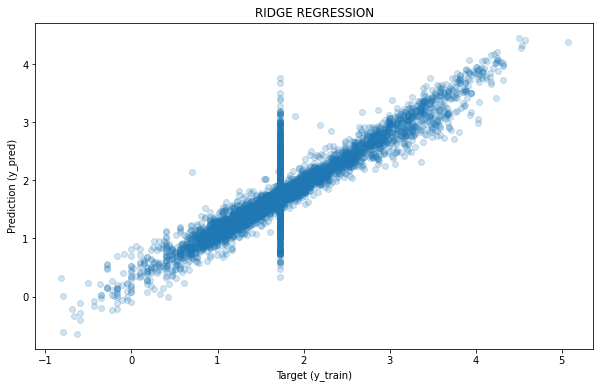

In [43]:
#Plotting the training set to see the model (real vs predict)

y_pred_train = ridge.predict(X_train)

plt.figure(figsize=(10,6))

plt.scatter(y_train['Price_log'], y_pred_train, alpha=0.2)

#plt.scatter(y_train['Price'], np.exp(y_pred_train), alpha=0.2)

plt.xlabel('Target (y_train)')

plt.ylabel('Prediction (y_pred)')

plt.title('RIDGE REGRESSION')


In [45]:
#trying lasso regression

from sklearn.linear_model import Lasso

lasso = Lasso()

lasso.fit(X_train, y_train['Price_log'])

# Get score of the model
print("*********LASSO**************")

print("*********Training set Metrics**************")

print("R-Squared:", lasso.score(X_train, y_train['Price_log']))

se_train = (y_train['Price_log'] - lasso.predict(X_train))**2

mse_train = se_train.mean()

print('MSE: ', mse_train)

print("********Validation set Metrics**************")

print("R-Squared:", lasso.score(X_test, y_test['Price_log']))

se_val = (y_test['Price_log'] - lasso.predict(X_test))**2

mse_val = se_val.mean()

print('MSE: ', mse_val)


*********LASSO**************
*********Training set Metrics**************
R-Squared: 0.5392518108240085
MSE:  0.29091672408621266
********Validation set Metrics**************
R-Squared: 0.5464804350071223
MSE:  0.29101476583969593


Text(0.5, 1.0, 'LASSO REGRESSION')

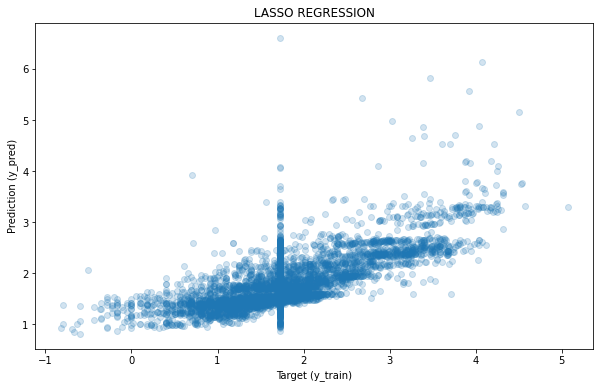

In [46]:
#Plotting the training set to see the model (real vs predict)

y_pred_train = lasso.predict(X_train)

plt.figure(figsize=(10,6))

plt.scatter(y_train['Price_log'], y_pred_train, alpha=0.2)

#plt.scatter(y_train['Price'], np.exp(y_pred_train), alpha=0.2)

plt.xlabel('Target (y_train)')

plt.ylabel('Prediction (y_pred)')

plt.title('LASSO REGRESSION')


In [20]:
lasso_model = get_model_score(lasso,True)

R-square on training set :  -1.3170677637501642
R-square on test set :  -0.10697057098948992
RMSE on training set :  15.605043977098351
RMSE on test set :  10.857571759910439


In [47]:
#Aditionally we try a K-fold cross-validation to evaluate the Ridge model

from sklearn.model_selection import cross_val_score

ridgeCV = Ridge()

cvs = cross_val_score(ridgeCV, X_train, y_train['Price_log'], cv = 10)

print("Mean Score:")

print(cvs.mean(), "\n")

print("Confidence Interval:")

cvs.mean() - cvs.std(), cvs.mean() + cvs.std() 

Mean Score:
0.7501900859164138 

Confidence Interval:


(0.7045529297757068, 0.7958272420571207)

**Observations from results: _____**
**********
The Regularization using the Ridge Regression - L2 works better than Lasso - L1  method, we can see on Training data the **R-Squared is ~0.86** which is very close to 1 and for Lasso we get ~0.54. Also its important to note that RSquared is very similar on Training and Test in Ridge.
For Mean Squared Error (MSE) also **Ridge performs better that Lasso** with values very close to 0 on training ~0.08 and test ~0.13
**********

### **Decision Tree** 

https://scikit-learn.org/stable/auto_examples/tree/plot_tree_regression.html

In [48]:
# Import Decision tree for Regression from sklearn
from sklearn.tree import DecisionTreeRegressor

In [49]:
# Create a decision tree regression model, use random_state = 1
dtree = DecisionTreeRegressor(random_state=1)

In [50]:
# Fit decision tree regression model
dtree.fit(X_train, y_train['Price_log'])

DecisionTreeRegressor(random_state=1)

In [51]:
#Get the depth of the regressor
dtree.get_depth()

42

In [52]:
# Get score of the model
print("*********DECISION TREE**************")

Dtree_model = get_model_score(dtree,True)

*********DECISION TREE**************
R-square on training set :  0.9999654878431764
R-square on test set :  0.5776550295944438
RMSE on training set :  0.06022567551846056
RMSE on test set :  6.706537141410474


Text(0.5, 1.0, 'DECISION TREE REGRESSOR')

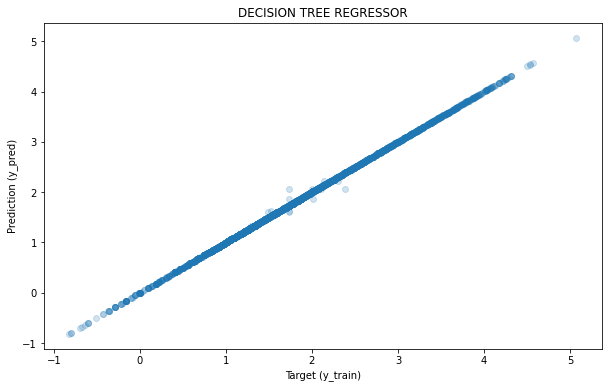

In [53]:
#Plotting the training set to see the model (real vs predict)

y_pred_train = dtree.predict(X_train)

plt.figure(figsize=(10,6))

plt.scatter(y_train['Price_log'], y_pred_train, alpha=0.2)

#plt.scatter(y_train['Price'], np.exp(y_pred_train), alpha=0.2)

plt.xlabel('Target (y_train)')

plt.ylabel('Prediction (y_pred)')

plt.title('DECISION TREE REGRESSOR')

**Observations from results: _____**
************
*Using the Decision Tree Regressor we can see a high value for the RSquared metric **~1.00 on the training data** but a poor score when is compared with the Test data ~0.57 metric. 

*We also obtained the value for the **depth of the tree: 42** which seems excesive, this can only be explained cause the model is overfitting trying to calculate too much detailed for the branches which will be untranslatable at the moment to explain this results to the business. We need to find more explainable decision tree without losing to much power of prediction 
************

Print the importance of features in the tree building. The importance of a feature is computed as the (normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance.


In [54]:
fimport = pd.DataFrame(dtree.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False)

fimport.head(15)


,Imp
Power,0.521629
Year,0.203986
kilometers_driven_log,0.050194
Engine,0.044306
Mileage,0.024525
New_price,0.009990
Location_Kolkata,0.005818
Transmission_Manual,0.005576
Location_Delhi,0.004834
Location_Coimbatore,0.004236


**Observations and insights: _____**
******************
The Top 5 most influence features in the Decision tree model are Power (0.52) , Year (0.20), the log(Kilometers_Driven) (0.05), Engine (0.04) and Mileage (0.02). Location doesnt appear on the top 5
******************

### **Random Forest**

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html

In [10]:
# Import Randomforest for Regression from sklearn
from sklearn.ensemble import RandomForestRegressor

In [11]:
# Create a Randomforest regression model 
regr = RandomForestRegressor()

In [12]:
# Fit Randomforest regression model
regr = regr.fit(X_train, y_train['Price_log'])

In [13]:
regr.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [14]:
# Get score of the model
print("*********RANDOM FOREST**************")

regr_model = get_model_score(regr,True)

*********RANDOM FOREST**************
R-square on training set :  0.9426633729561066
R-square on test set :  0.6969727298921097
RMSE on training set :  2.454775046169152
RMSE on test set :  5.680748042126739


***Evaluating Training Data***

Text(0.5, 1.0, 'RANDOM FOREST REGRESSOR')

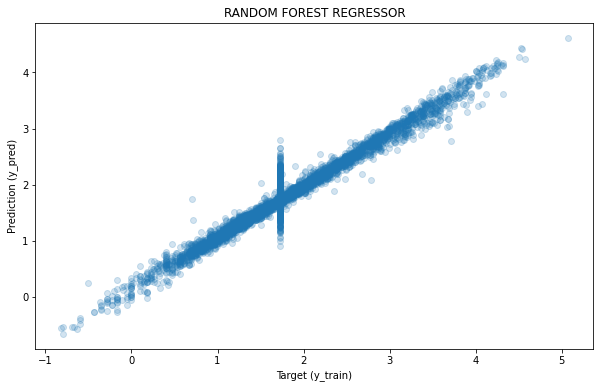

In [61]:
#Plotting the training set to see the model (real vs predict)

y_pred_train = regr.predict(X_train)

plt.figure(figsize=(10,6))

plt.scatter(y_train['Price_log'], y_pred_train, alpha=0.2)

#plt.scatter(y_train['Price'], np.exp(y_pred_train), alpha=0.2)

plt.xlabel('Target (y_train)')

plt.ylabel('Prediction (y_pred)')

plt.title('RANDOM FOREST REGRESSOR')

***Evaluating Testing Data***

Text(0.5, 1.0, 'RANDOM FOREST REGRESSOR')

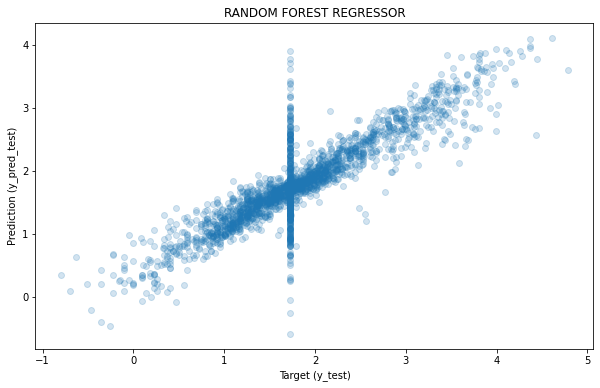

In [16]:
#Now Plotting on TEST set to see the model (real vs predict)

y_pred_test = regr.predict(X_test)

plt.figure(figsize=(10,6))

plt.scatter(y_test['Price_log'], y_pred_test, alpha=0.2)

#plt.scatter(y_train['Price'], np.exp(y_pred_train), alpha=0.2)

plt.xlabel('Target (y_test)')

plt.ylabel('Prediction (y_pred_test)')

plt.title('RANDOM FOREST REGRESSOR')

In [25]:
#Checking nominal predictions versus target value
df_eval = pd.DataFrame(np.exp(y_pred_test), columns=['Predicted'])

y_test = y_test.reset_index(drop=True)
df_eval['Target'] = np.exp(y_test['Price_log'])

#adding residuals and diff
df_eval['Residual'] = df_eval['Target'] - df_eval['Predicted']
df_eval['Diff %'] = np.absolute(df_eval['Residual'] / df_eval['Target']) * 100

pd.set_option('display.float_format', lambda x: '%.2f' % x)

df_eval


,Predicted,Target,Residual,Diff %
0,5.86,6.00,0.14,2.39
1,5.71,5.64,-0.07,1.25
2,6.37,5.64,-0.73,12.98
3,4.29,3.90,-0.39,10.00
4,5.66,6.34,0.68,10.66
...,...,...,...,...
2171,7.04,6.58,-0.46,6.94
2172,3.47,5.64,2.17,38.56
2173,3.96,5.64,1.68,29.79
2174,10.60,9.75,-0.85,8.76


In [30]:
df_eval.sort_values(by=['Diff %']).head(50)


,Predicted,Target,Residual,Diff %
596,4.20,4.20,0.00,0.00
1419,48.00,48.00,0.00,0.01
703,5.45,5.45,0.00,0.01
825,28.00,28.00,0.00,0.01
958,6.00,6.00,0.00,0.02
259,28.96,28.95,-0.01,0.02
1712,4.75,4.75,0.00,0.04
224,5.20,5.20,-0.00,0.04
371,9.51,9.50,-0.01,0.06
2018,4.86,4.86,-0.00,0.08


In [31]:
df_eval.sort_values(by=['Diff %']).tail(50)

,Predicted,Target,Residual,Diff %
1022,13.19,5.64,-7.55,133.85
1015,13.20,5.64,-7.56,134.01
407,13.23,5.64,-7.59,134.62
1493,2.36,1.00,-1.36,135.72
905,13.31,5.64,-7.67,136.08
1156,13.39,5.64,-7.75,137.37
1498,1.93,0.80,-1.13,141.63
2092,14.50,6.00,-8.50,141.70
1931,13.80,5.64,-8.16,144.60
632,13.85,5.64,-8.21,145.58


In [24]:
df_eval.describe()

,Predicted,Target,Residual,Diff %
count,2176.000000,2176.000000,2176.000000,2176.000000
mean,7.934505,8.851664,0.917158,27.186051
std,7.341376,10.322015,5.607510,46.172678
min,0.553222,0.450000,-43.990436,0.001132
25%,3.854072,3.890000,-0.578637,6.695490
50%,5.632426,5.640000,0.060781,15.660315
75%,8.807636,8.500000,1.343683,31.414193
max,61.410015,120.000000,83.280975,779.972267


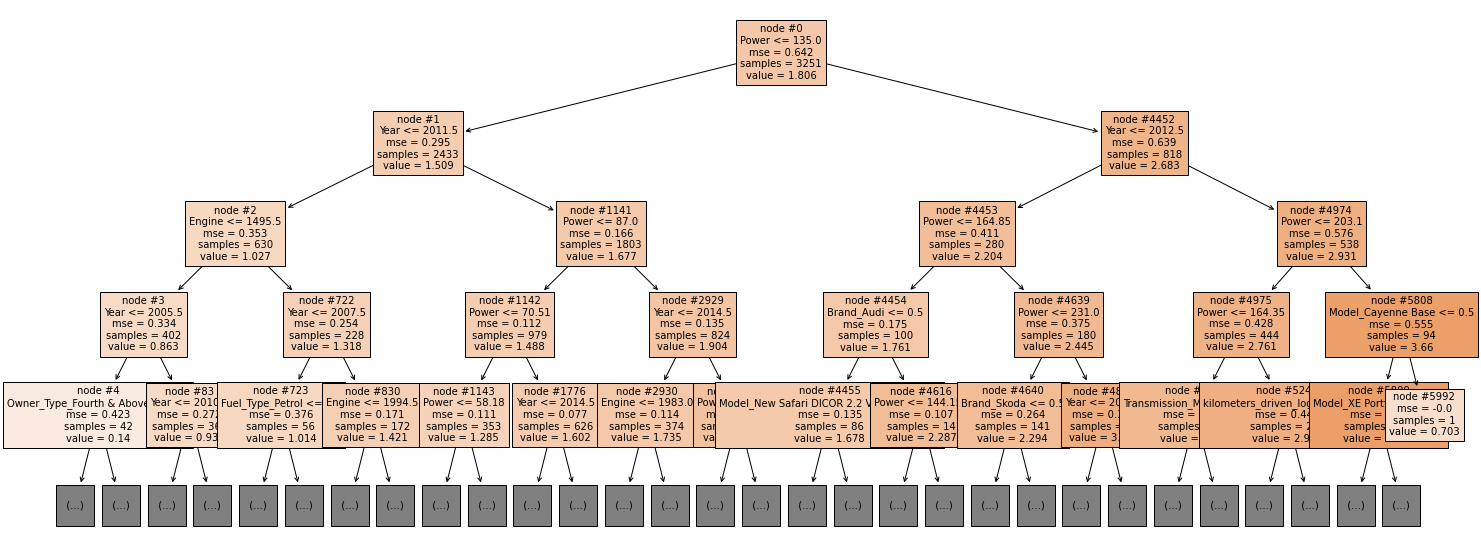

In [63]:
#Plotting just one of the trees of the forest (estimators_[0].....)
from sklearn import tree

plt.figure(figsize=(25,10))
#for i in range(len(regr_tuned.estimators_))
tree.plot_tree(regr.estimators_[0],filled=True,fontsize = 10,node_ids = True, class_names = True,feature_names = X_train.columns,max_depth=4)
plt.show()

**Observations and insights: _____**
***********
The default execution of the Random Forest algorithm perform almost at the same level of Ridge Regression but its a little less precise on the test set (0.68), Its better than Lasso Regularization and better than the Ordinary Less Squares (OLS) and Multiple Linear Regression. As we can see using the getparams() function this model is untuned so later we can adjust some parameters to find a more fitted solution.

***********

**Feature Importance**

In [65]:
# Print important features similar to decision trees
fimport = pd.DataFrame(regr.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False)

fimport.head(15)


,Imp
Power,0.531563
Year,0.199558
kilometers_driven_log,0.048072
Engine,0.041048
Mileage,0.021488
New_price,0.009154
Location_Kolkata,0.005675
Location_Hyderabad,0.004410
Location_Coimbatore,0.004319
Brand_Tata,0.004251


**Observations and insights: _____**
***********
The feature importance follows the same ranking that we have seen on prior models like default Decision tree: Power, Year, log of Kms driven, engine and mileage are the top 5 power predictors. Power contributes with a the heavier coefficient.

Location still doesnt appear to be relevant
***********

### **Hyperparameter Tuning: Decision Tree**

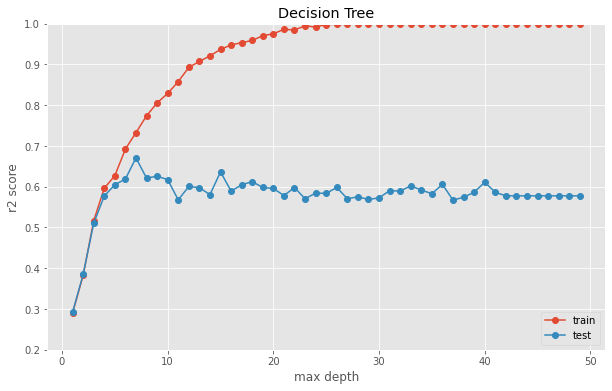

In [66]:
#FInding the best Depth parameter
import matplotlib.pyplot as plt

plt.style.use('ggplot')

train_scores = []
test_scores = []

for depth in range(1, 50):

    dtree_depth_tuned = DecisionTreeRegressor(max_depth = depth,random_state=1)    
    dtree_depth_tuned = dtree_depth_tuned.fit(X_train,  y_train['Price_log'])

    train_scores.append(get_model_score(dtree_depth_tuned,False)[0])
    test_scores.append(get_model_score(dtree_depth_tuned,False)[1])


plt.plot(range(1, 50), train_scores, '-o', label = "train")
plt.plot(range(1, 50), test_scores, '-o', label = "test")

plt.legend(loc = 'lower right')
plt.xlabel('max depth')
plt.ylim(0.2, 1)
plt.ylabel('r2 score')
plt.title(F"Decision Tree")

fig = plt.gcf()
fig.set_size_inches(10,6)

plt.show()

In [67]:
#Validating the scores with depth = 7
dtree_depth_tuned = DecisionTreeRegressor(max_depth = 7,random_state = 1)  

dtree_depth_tuned.fit(X_train, y_train['Price_log'])

# Get score of the model
print("*********DECISION TREE DEPTH = 7 TUNED**************")

dtree_depth_tuned_model = get_model_score(dtree_depth_tuned,True)


*********DECISION TREE DEPTH = 7 TUNED**************
R-square on training set :  0.7327054673977684
R-square on test set :  0.6708136854603116
RMSE on training set :  5.3001805874348165
RMSE on test set :  5.920870421487926


In [68]:
#Now using GridSearchCV 
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

# Choose the type of estimator 
dtree_tuned = DecisionTreeRegressor(random_state = 1)

# Grid of parameters to choose from
# Check documentation for all the parametrs that the model takes and play with those
parameters = {
    'max_depth': np.arange(5, 10),
    'min_samples_leaf': np.arange(5, 10),
    #"max_leaf_nodes":[None,10,20,30,40,50,60,70,80,90]
    }

# Type of scoring used to compare parameter combinations
scorer = 'neg_mean_squared_error'

# Run the grid search
grid_obj = GridSearchCV(estimator=dtree_tuned, param_grid=parameters, scoring = scorer)
grid_obj = grid_obj.fit(X_train,y_train['Price_log'])

# Set the model to the best combination of parameters
dtree_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data
dtree_tuned.fit(X_train, y_train['Price_log'])

DecisionTreeRegressor(max_depth=7, min_samples_leaf=8, random_state=1)

In [69]:
# Get score of the dtree_tuned with GridSearchCV
print("*********DECISION TREE TUNED**************")

dtree_tuned_model = get_model_score(dtree_tuned,True)

*********DECISION TREE TUNED**************
R-square on training set :  0.7170893712733358
R-square on test set :  0.6569997784854644
RMSE on training set :  5.452808694971895
RMSE on test set :  6.043824864287825


Text(0.5, 1.0, 'TUNED DECISION TREE REGRESSION')

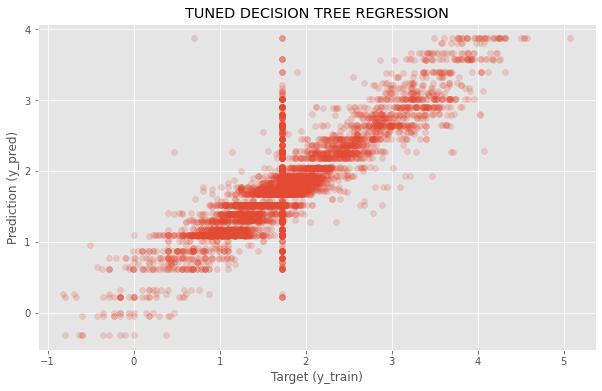

In [71]:
#Plotting the training set to see the model (real vs predict)

y_pred_train = dtree_tuned.predict(X_train)

plt.figure(figsize=(10,6))

plt.scatter(y_train['Price_log'], y_pred_train, alpha=0.2)

#plt.scatter(y_train['Price'], np.exp(y_pred_train), alpha=0.2)

plt.xlabel('Target (y_train)')

plt.ylabel('Prediction (y_pred)')

plt.title('TUNED DECISION TREE REGRESSION')

**Observations and insights: _____**

************
After some hyperparameter tuning on the Decision Tree model we **improve the r2 score on the test data with 0.65 versus 0.57** with the default model, this comes at the cost of lowering the score of the r2 training data but its ok because we are seeking to **counteract the Overfitting** behaviour.

Aditionally, we plotted an iteration with the max_depth hyperparameter to find a more suitable value since the default model give us the metric of 42 which seems excesive. In this exercice we look for a value with 50 as max. After reviewing the plot we can easily see that the **best compromise between training and test score is for depth = 7**. This also confirms the GridSearchCV but in a graphic way to be understandable and explainable at the moment of translate the insigths
************

**Feature Importance**

In [72]:
# Print important features of tuned decision tree similar to decision trees
fimport = pd.DataFrame(dtree_tuned.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False)

fimport.head(10)

,Imp
Power,0.663150
Year,0.249399
Engine,0.043143
Mileage,0.010847
kilometers_driven_log,0.008783
Transmission_Manual,0.004447
Fuel_Type_Diesel,0.003221
Brand_Tata,0.002838
Location_Kolkata,0.002593
Brand_BMW,0.002102


|--- feature_3 <= 135.00
|   |--- feature_0 <= 2011.50
|   |   |--- feature_2 <= 1495.50
|   |   |   |--- feature_0 <= 2005.50
|   |   |   |   |--- feature_0 <= 2001.50
|   |   |   |   |   |--- value: [-0.32]
|   |   |   |   |--- feature_0 >  2001.50
|   |   |   |   |   |--- feature_24 <= 0.50
|   |   |   |   |   |   |--- feature_6 <= 11.21
|   |   |   |   |   |   |   |--- value: [0.65]
|   |   |   |   |   |   |--- feature_6 >  11.21
|   |   |   |   |   |   |   |--- value: [0.22]
|   |   |   |   |   |--- feature_24 >  0.50
|   |   |   |   |   |   |--- value: [-0.04]
|   |   |   |--- feature_0 >  2005.50
|   |   |   |   |--- feature_0 <= 2008.50
|   |   |   |   |   |--- feature_53 <= 0.50
|   |   |   |   |   |   |--- feature_1 <= 17.40
|   |   |   |   |   |   |   |--- value: [0.61]
|   |   |   |   |   |   |--- feature_1 >  17.40
|   |   |   |   |   |   |   |--- value: [0.87]
|   |   |   |   |   |--- feature_53 >  0.50
|   |   |   |   |   |   |--- value: [-0.01]
|   |   |   |   |--- feat

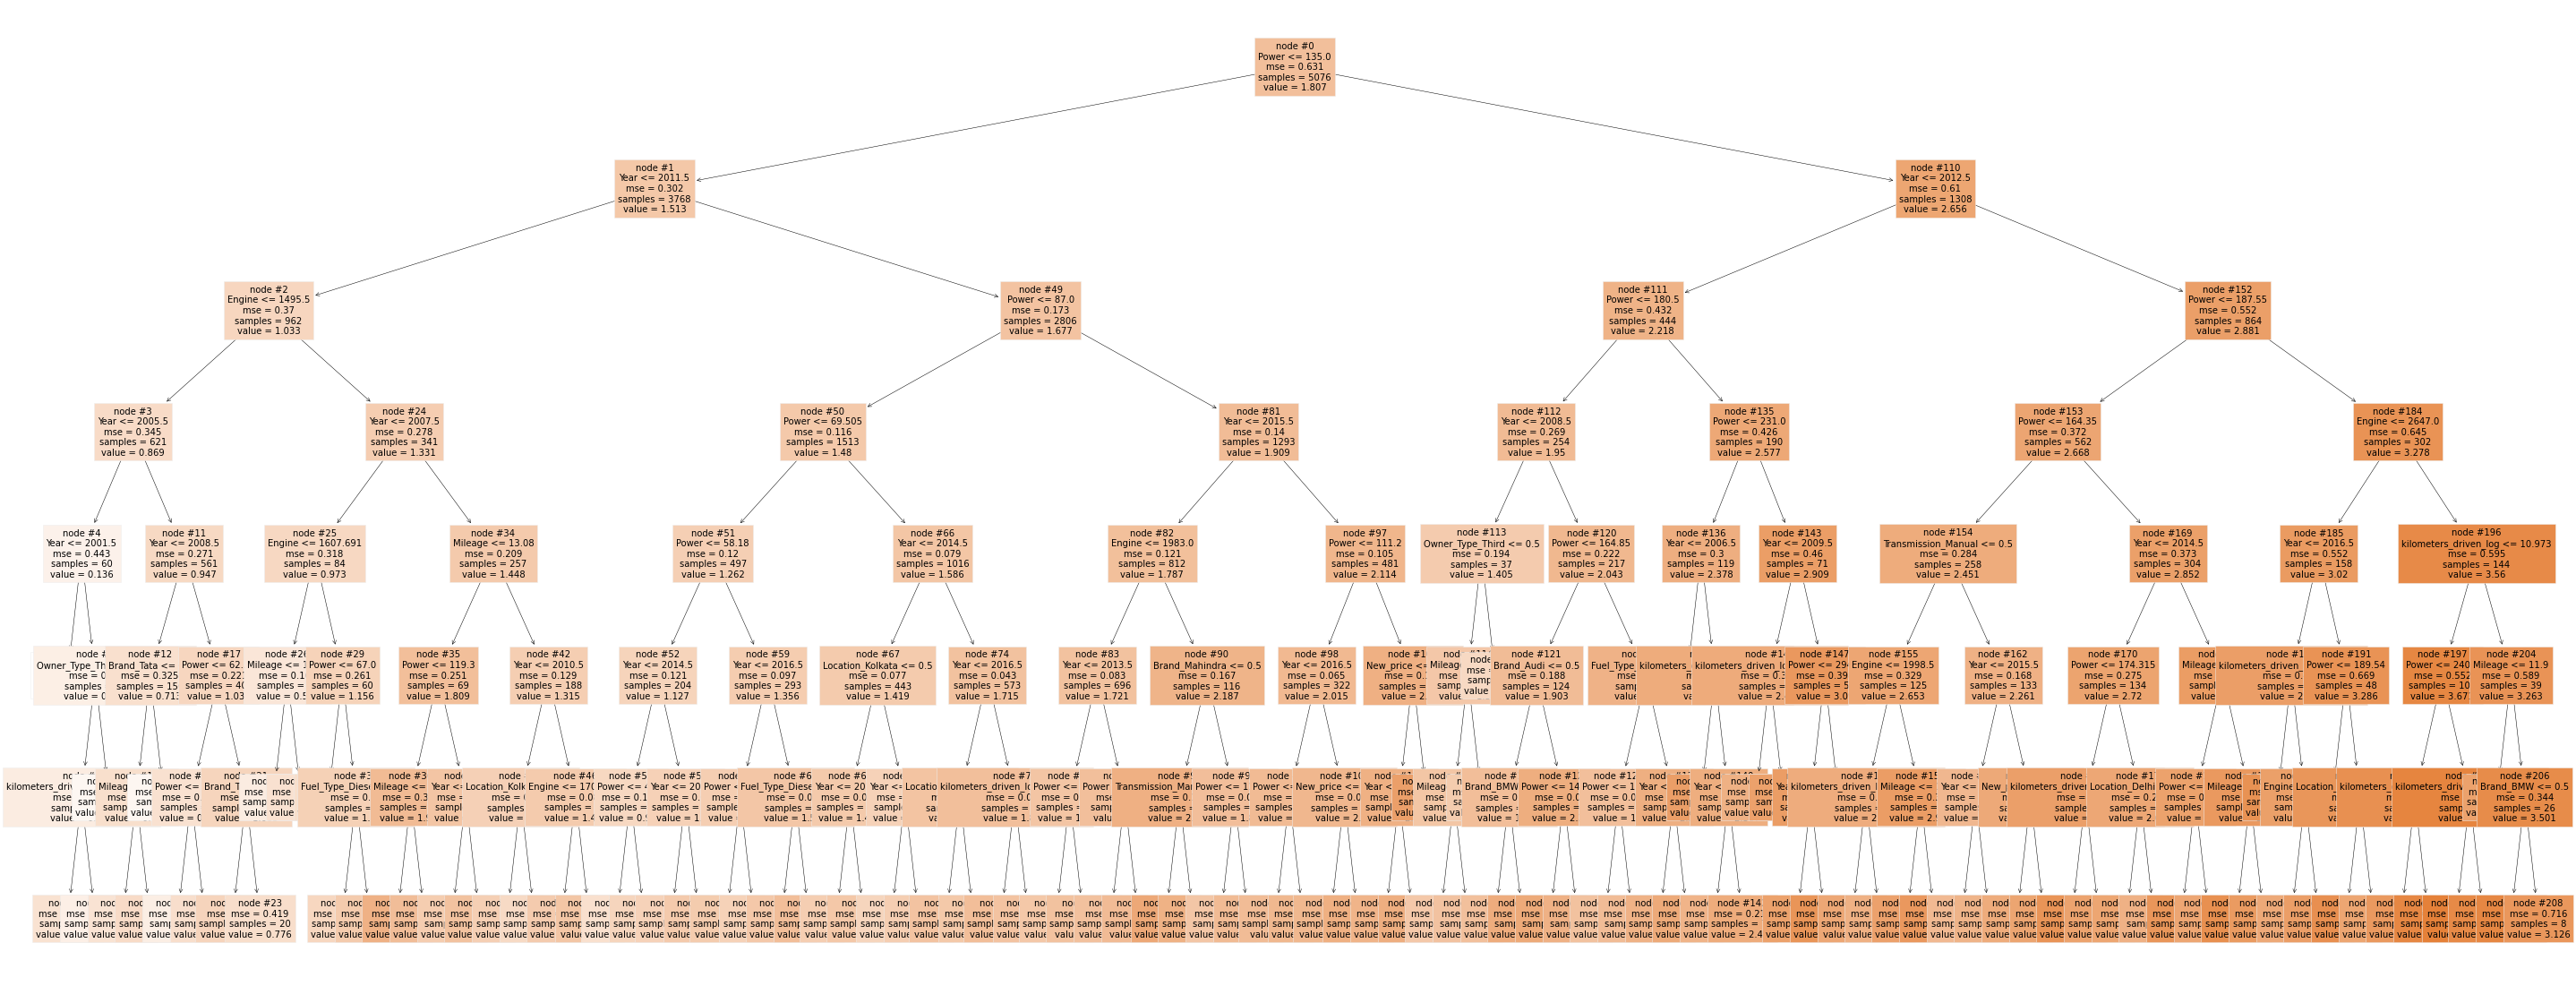

In [73]:
from sklearn import tree

# Creating a decision tree model
dt = tree.DecisionTreeRegressor(max_depth=7, min_samples_leaf=8, random_state=1)

# Fitting the model on the train data
dt = dt.fit(X_train, y_train['Price_log'])

text_representation = tree.export_text(dt)
print(text_representation)

fig = plt.figure(figsize=(50,20))

features = X_train.columns

out = tree.plot_tree(dt, filled = True,feature_names = features,fontsize = 10,node_ids = True, class_names = True)
     
plt.show()

**Observations and insights: _____**
*****************
After the hyperparameter tuning using the GridSearchCrossValidation we plot the tuned tree in both modes (text and graph) to see the flow of decisions and the respective nodes. Here we can confirm the importance of the top 5 features being Power - Year - Engine - Mileage - KmsDriven (log)
*****************


### **Hyperparameter Tuning: Random Forest**

In [74]:
from sklearn.ensemble import RandomForestRegressor


# Choose the type of Regressor
#regr_tuned = RandomForestRegressor(random_state = 1)
regr_tuned = RandomForestRegressor()

# Define the parameters for Grid to choose from 
# Check documentation for all the parametrs that the model takes and play with those
parameters = {
    'max_depth': np.arange(6, 10),  
    'min_samples_leaf': np.arange(1, 5), 
    'n_estimators':[5,10,15,20,25,30,35,40]
    }

# Type of scoring used to compare parameter combinations
scorer =  'neg_mean_squared_error'

# Run the grid search
grid_obj = GridSearchCV(estimator=regr_tuned, param_grid=parameters, scoring = scorer, cv=10)
grid_obj = grid_obj.fit(X_train,y_train['Price_log'])

# Set the model to the best combination of parameters
regr_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data
regr_tuned.fit(X_train, y_train['Price_log'])

RandomForestRegressor(max_depth=9, min_samples_leaf=2, n_estimators=35)

In [75]:
# Get score of the model
print("*********RANDOM FOREST TUNED**************")

regr_tuned_model = get_model_score(regr_tuned,True)

*********RANDOM FOREST TUNED**************
R-square on training set :  0.817454024451805
R-square on test set :  0.6785357366902688
RMSE on training set :  4.380077155946453
RMSE on test set :  5.851012431039489


Text(0.5, 1.0, 'TUNED RANDOM FOREST REGRESSION')

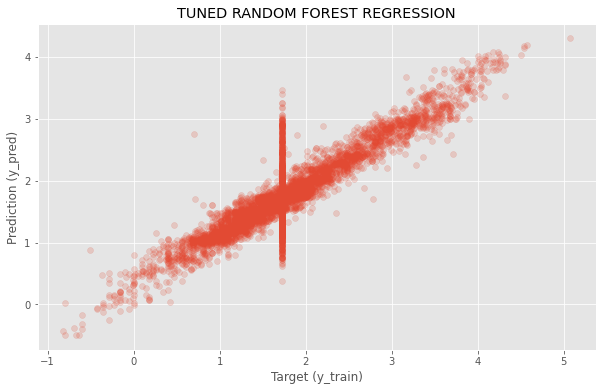

In [76]:
#Plotting the training set to see the model (real vs predict)

y_pred_train = regr_tuned.predict(X_train)

plt.figure(figsize=(10,6))

plt.scatter(y_train['Price_log'], y_pred_train, alpha=0.2)

#plt.scatter(y_train['Price'], np.exp(y_pred_train), alpha=0.2)

plt.xlabel('Target (y_train)')

plt.ylabel('Prediction (y_pred)')

plt.title('TUNED RANDOM FOREST REGRESSION')

**Observations and insights: _____**
*************
In the case of the Hyperparameter tuning for the Randomw Forest model we look for the best number of n_estimators, since in this technique we use a set of random trees for optimize the fit. The GridSearch optimizer us used to look between an arbitrary set of options from 10, 20, 30 and 40.

Tuning of this kind of models is a very time-consuming task, so we need to look carefuly and take an approach of trial an error for parameters choice. in this case takes almost 2 hours to get the following results **max_depth=9, min_samples_leaf=2, n_estimators=35**

If time is not a constrain we can search for multiple combinations, for the moment this results allow us to rerun the model and get new score, but in this case the value obtained is a bit worse compared both on training and test data. Probably this need more work to get the right parameters to choose from
*************

**Feature Importance**

In [44]:
# Print important features of tuned decision tree similar to decision trees
fimport = pd.DataFrame(regr_tuned.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False)

fimport.head(10)

,Imp
Power,0.615129
Year,0.222771
Engine,0.040300
kilometers_driven_log,0.026585
Mileage,0.016682
New_price,0.007942
Brand_Tata,0.005169
Transmission_Manual,0.005024
Location_Kolkata,0.004178
Brand_Land,0.003841


In [57]:
regr_tuned.estimators_[0]

DecisionTreeRegressor(max_depth=9, max_features='auto', min_samples_leaf=2,
                      random_state=1613369696)

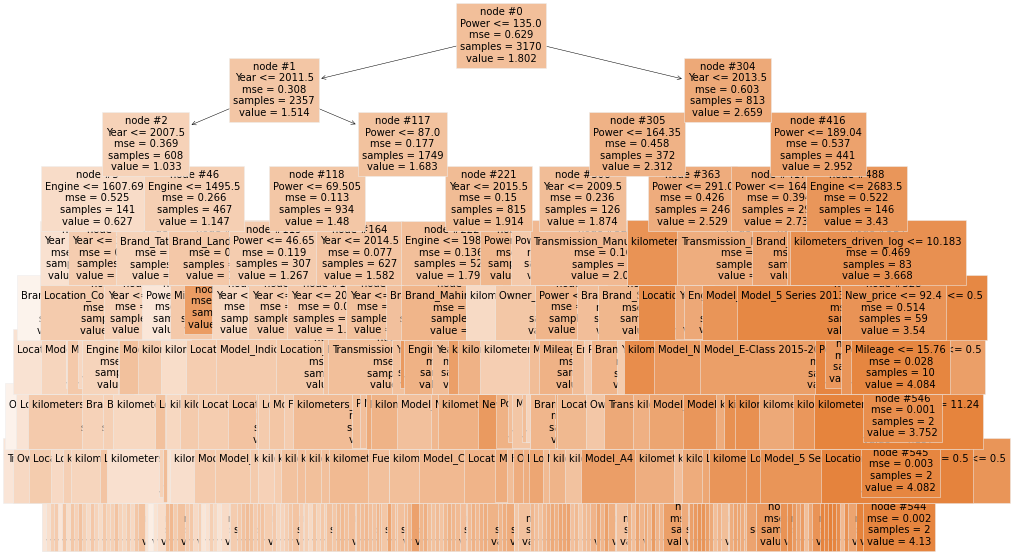

In [59]:
plt.figure(figsize=(15,10))
#for i in range(len(regr_tuned.estimators_))
tree.plot_tree(regr_tuned.estimators_[0],filled=True,fontsize = 10,node_ids = True, class_names = True,feature_names = X_train.columns)
plt.show()

**Observations and insights: ______**
***************
In this case after the Random Forest tuning we can see slightly change in the importance of the features. Power is still on top with Year but Engine, MIleage and Kms driven keep changing in order, this is because their percentages are very lower compared to the first two so any little change in tuning had an impact on her importance.

Also we see some features related to Brands appearing on the top 10 but with a very little contribution 

***************

In [45]:
# Defining list of models you have trained
models = [lr, ridge,lasso,dtree,dtree_depth_tuned, dtree_tuned, regr, regr_tuned]

# Defining empty lists to add train and test results
r2_train = []
r2_test = []
rmse_train = []
rmse_test = []

#Adding KFold Cross Validation
KfoldCV_train = []
KfoldCV_test = []

# Looping through all the models to get the rmse and r2 scores
for model in models:
    
    # Accuracy score
    j = get_model_score(model, False)
    
    r2_train.append(j[0])
    
    r2_test.append(j[1])
    
    rmse_train.append(j[2])
    
    rmse_test.append(j[3])

    KfoldCV_train.append(np.mean(cross_val_score(model, X_train, y_train['Price_log'], cv=5)))

    KfoldCV_test.append(np.mean(cross_val_score(model, X_test, y_test['Price_log'], cv=5)))

In [46]:
comparison_frame = pd.DataFrame({'Model':['Linear Regression','Ridge','Lasso','Decision Tree','Decision Tree Depth', 'Decision Tree Tuned','Random Forest','Random Forest Tuned'], 
                                          'Train_r2': r2_train,'Test_r2': r2_test,
                                          'Train_RMSE': rmse_train,'Test_RMSE': rmse_test,'Train_KFoldCV':KfoldCV_train,'Test_KFoldCV':KfoldCV_test }) 
comparison_frame

,Model,Train_r2,Test_r2,Train_RMSE,Test_RMSE,Train_KFoldCV,Test_KFoldCV
0,Linear Regression,0.880082,0.599466,3.550080,6.531074,-1.067294e+17,-1.206105e+16
1,Ridge,0.842285,0.719611,4.071292,5.464437,7.550760e-01,7.840361e-01
2,Lasso,-1.317068,-0.106971,15.605044,10.857572,5.373882e-01,5.652799e-01
3,Decision Tree,0.999965,0.577655,0.060226,6.706537,5.525027e-01,5.775583e-01
4,Decision Tree Depth,0.732705,0.670814,5.300181,5.920870,6.937866e-01,6.835265e-01
5,Decision Tree Tuned,0.717089,0.657000,5.452809,6.043825,7.006751e-01,6.920558e-01
6,Random Forest,0.943433,0.695368,2.438242,5.695767,7.427698e-01,7.677609e-01
7,Random Forest Tuned,0.811449,0.686359,4.451537,5.779378,7.434419e-01,7.647541e-01


**Observations: _____**
***************
RSquared:
* Evaluating the scoring of the different models we can say about the metric of RSquared that Default Decision Tree (0.999) and Ridge Regression (0.71) had the better scores on training and test data respectively.
* Also the worst performers are Lasso Regression (by far), Random Forest Tuned (0.81) on training and Default Decision Tree (0.57) on test data for rsquared metric 

RMSE:  
* The best models that had the lower values on this metric are the Default Decision Tree (0.06) and Ridge (5.46) for training and test data
* For the worst performers we had Lasso Reg, the Decision Tree Tuned (5.45) for training data and the default Decision Tree (6.70) for test 

KFOLDCV:
* Additionally we include another metric and modify the code provided just to test the CrossValidation with 5 splits (cv=5). We can also see that Ridge have the better score and Linear regression has the worst with strange values (Note: maybe this KFold doesnt apply to LR)
***************

**Note:** You can also try some other algorithms such as KNN and compare the model performance with the existing ones.

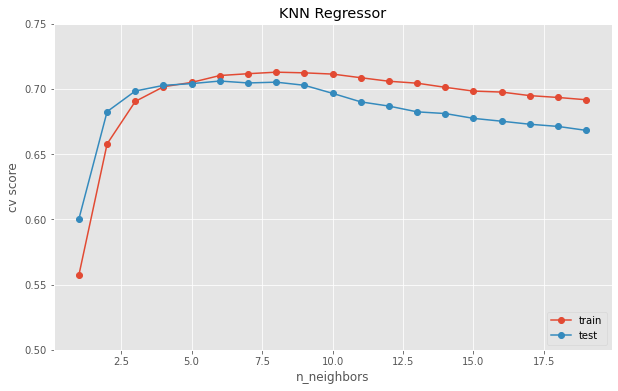

In [47]:
from sklearn.neighbors import KNeighborsRegressor

cv_score_train=[]
cv_score_test=[]

for i in range(1,20):

    knn = KNeighborsRegressor(n_neighbors= i)
    cv_score_train.append(np.mean(cross_val_score(knn,X_train,y_train['Price_log'],cv=5)))
    cv_score_test.append(np.mean(cross_val_score(knn,X_test,y_test['Price_log'],cv=5)))

x = range(1,10)

plt.plot(range(1, 20), cv_score_train, '-o', label = "train")
plt.plot(range(1, 20), cv_score_test, '-o', label = "test")

plt.xlabel('n_neighbors')
plt.ylim(0.5, 0.75)
plt.ylabel('cv score')
plt.title(F"KNN Regressor")

plt.legend(loc = 'lower right')

fig = plt.gcf()
fig.set_size_inches(10,6)

plt.show()


In [48]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors=5)

knn = knn.fit(X_train,y_train['Price_log'])

print("*********KNN REGRESSOR TRAIN SCORE**************")

print(np.mean(cross_val_score(knn,X_train,y_train['Price_log'],cv=5)))

knn = KNeighborsRegressor(n_neighbors=5)

knn = knn.fit(X_test,y_test['Price_log'])

print("*********KNN REGRESSOR TEST SCORE**************")

print(np.mean(cross_val_score(knn,X_test,y_test['Price_log'],cv=5)))

*********KNN REGRESSOR TRAIN SCORE**************
0.7049592003279439
*********KNN REGRESSOR TEST SCORE**************
0.7040255880248559


**********************
*******ADDITIONAL ANALYSIS USING KNN**********

We implement another technique such as K Neigborhs to compute the scores for train and test data. In the plot above we can observe a clear trend which is improving from n_neighbors = 1 to 8 for the training data but after 8 its sligthly decaying. Meanwhile for the test data we can see improvement until n_neighbors = 6 an then after n=8 decays in a more aggresive way.

For this model we can establish a middle point when the score of training ~= score test aroun 0.7. That will be n_neighbors = 5
*********************


### **Insights**

**Refined insights**:
- What are the most meaningful insights from the data relevant to the problem?

* The Power and Year features has the bigger impact as the two main coefficients for all the models tested so far. Together combined they concentrate aroun 0.7 - 0.8 of the weigth for the models
* Contrary at what i suppossed at the begining the Owner Type nor Transmission nor Location features appears in any of the rankings of feature importance to be considered as an important variable
* Maybe the relative importance of this other variables are dwarfed by the weigth of Power and Year, knowing this we can refine the analysis spliting the data set even more and having a more specific solution after a segmentation based on Power and year


**Comparison of various techniques and their relative performance**:

* After reviewing all the performance KPIs we can conclude that Ridge Regression and the default Random Forest presents the most balanced scores between Testing and Training data, particulary on Random Forest we still had margin to improve the scores since we try only a set of combinations due to time of processing. Its interesting to point that tuning on RF give us a slightly worse result so maybe the hyperparameters are still far to be optimized.

* The relative worst model by far in generally was the Lasso Regularization which fits the data very badly and in terms of test data is the Multiple Linear Regression

* Another important note is about the extra model KNN, this models presents almost exactly same value for training and test ~ 0.7 which cannot be over passed. The issue with this model is there's no easy way to know what's the importance of the features on the final model. Cant find a quick way to solve it and the model doesnt implement a Feature_importance() function. This may results in a impossibility to explain the model to the business and can be missleading in terms of strategize any action


**Proposal for the final solution design**:

* At the moment Ridge Rgression had the better overall performance on test data however based on the comparison the Random Forest seems to be more convenient for interpretability. The performance is almost the same but it will be more easy to digest and explain. 

* However, as indicated, the coefficients of the variables can be improved with more tuning of hyperparameters for the Random Forest Regressor, although the weight of the top features probably does not vary too much.

* The Feature importance table for the model selected will help to the business to determine what should be the staring point for the segmentation strategy for any new model of cars they will need to offer. This will give a logical precedence of criteria for the price in the used cars market